### About

This notebook runs the Multiclass K-Trees model using the LSST-like dataset of Pan-STARRS, GALEX, and AllWISE. It uses the magntiude columns and redshift, and derives colors based off of adjacent columns. It filters down to classes that have at least 6 samples total. We assume that any less will be insufficient for gaining patterns. 

Scroll down and see the resulting plots from this analysis.


Data Filters
------------------
num_runs : 1
test_on_train : False
folds : 3
data_split : 0.3
top_classes : None
one_all : None
subsample : None
transform_features : True
transform_labels : False
incl_redshift : True
min_class_size : 6
pca : None
naive : False

Features
------------------
Total: 11
GALEXAIS_FUV, GALEXAIS_NUV, AllWISE_W1mag, AllWISE_W2mag, AllWISE_W3mag, AllWISE_W4mag, PS1_gmag, PS1_rmag, PS1_imag, PS1_zmag, PS1_ymag


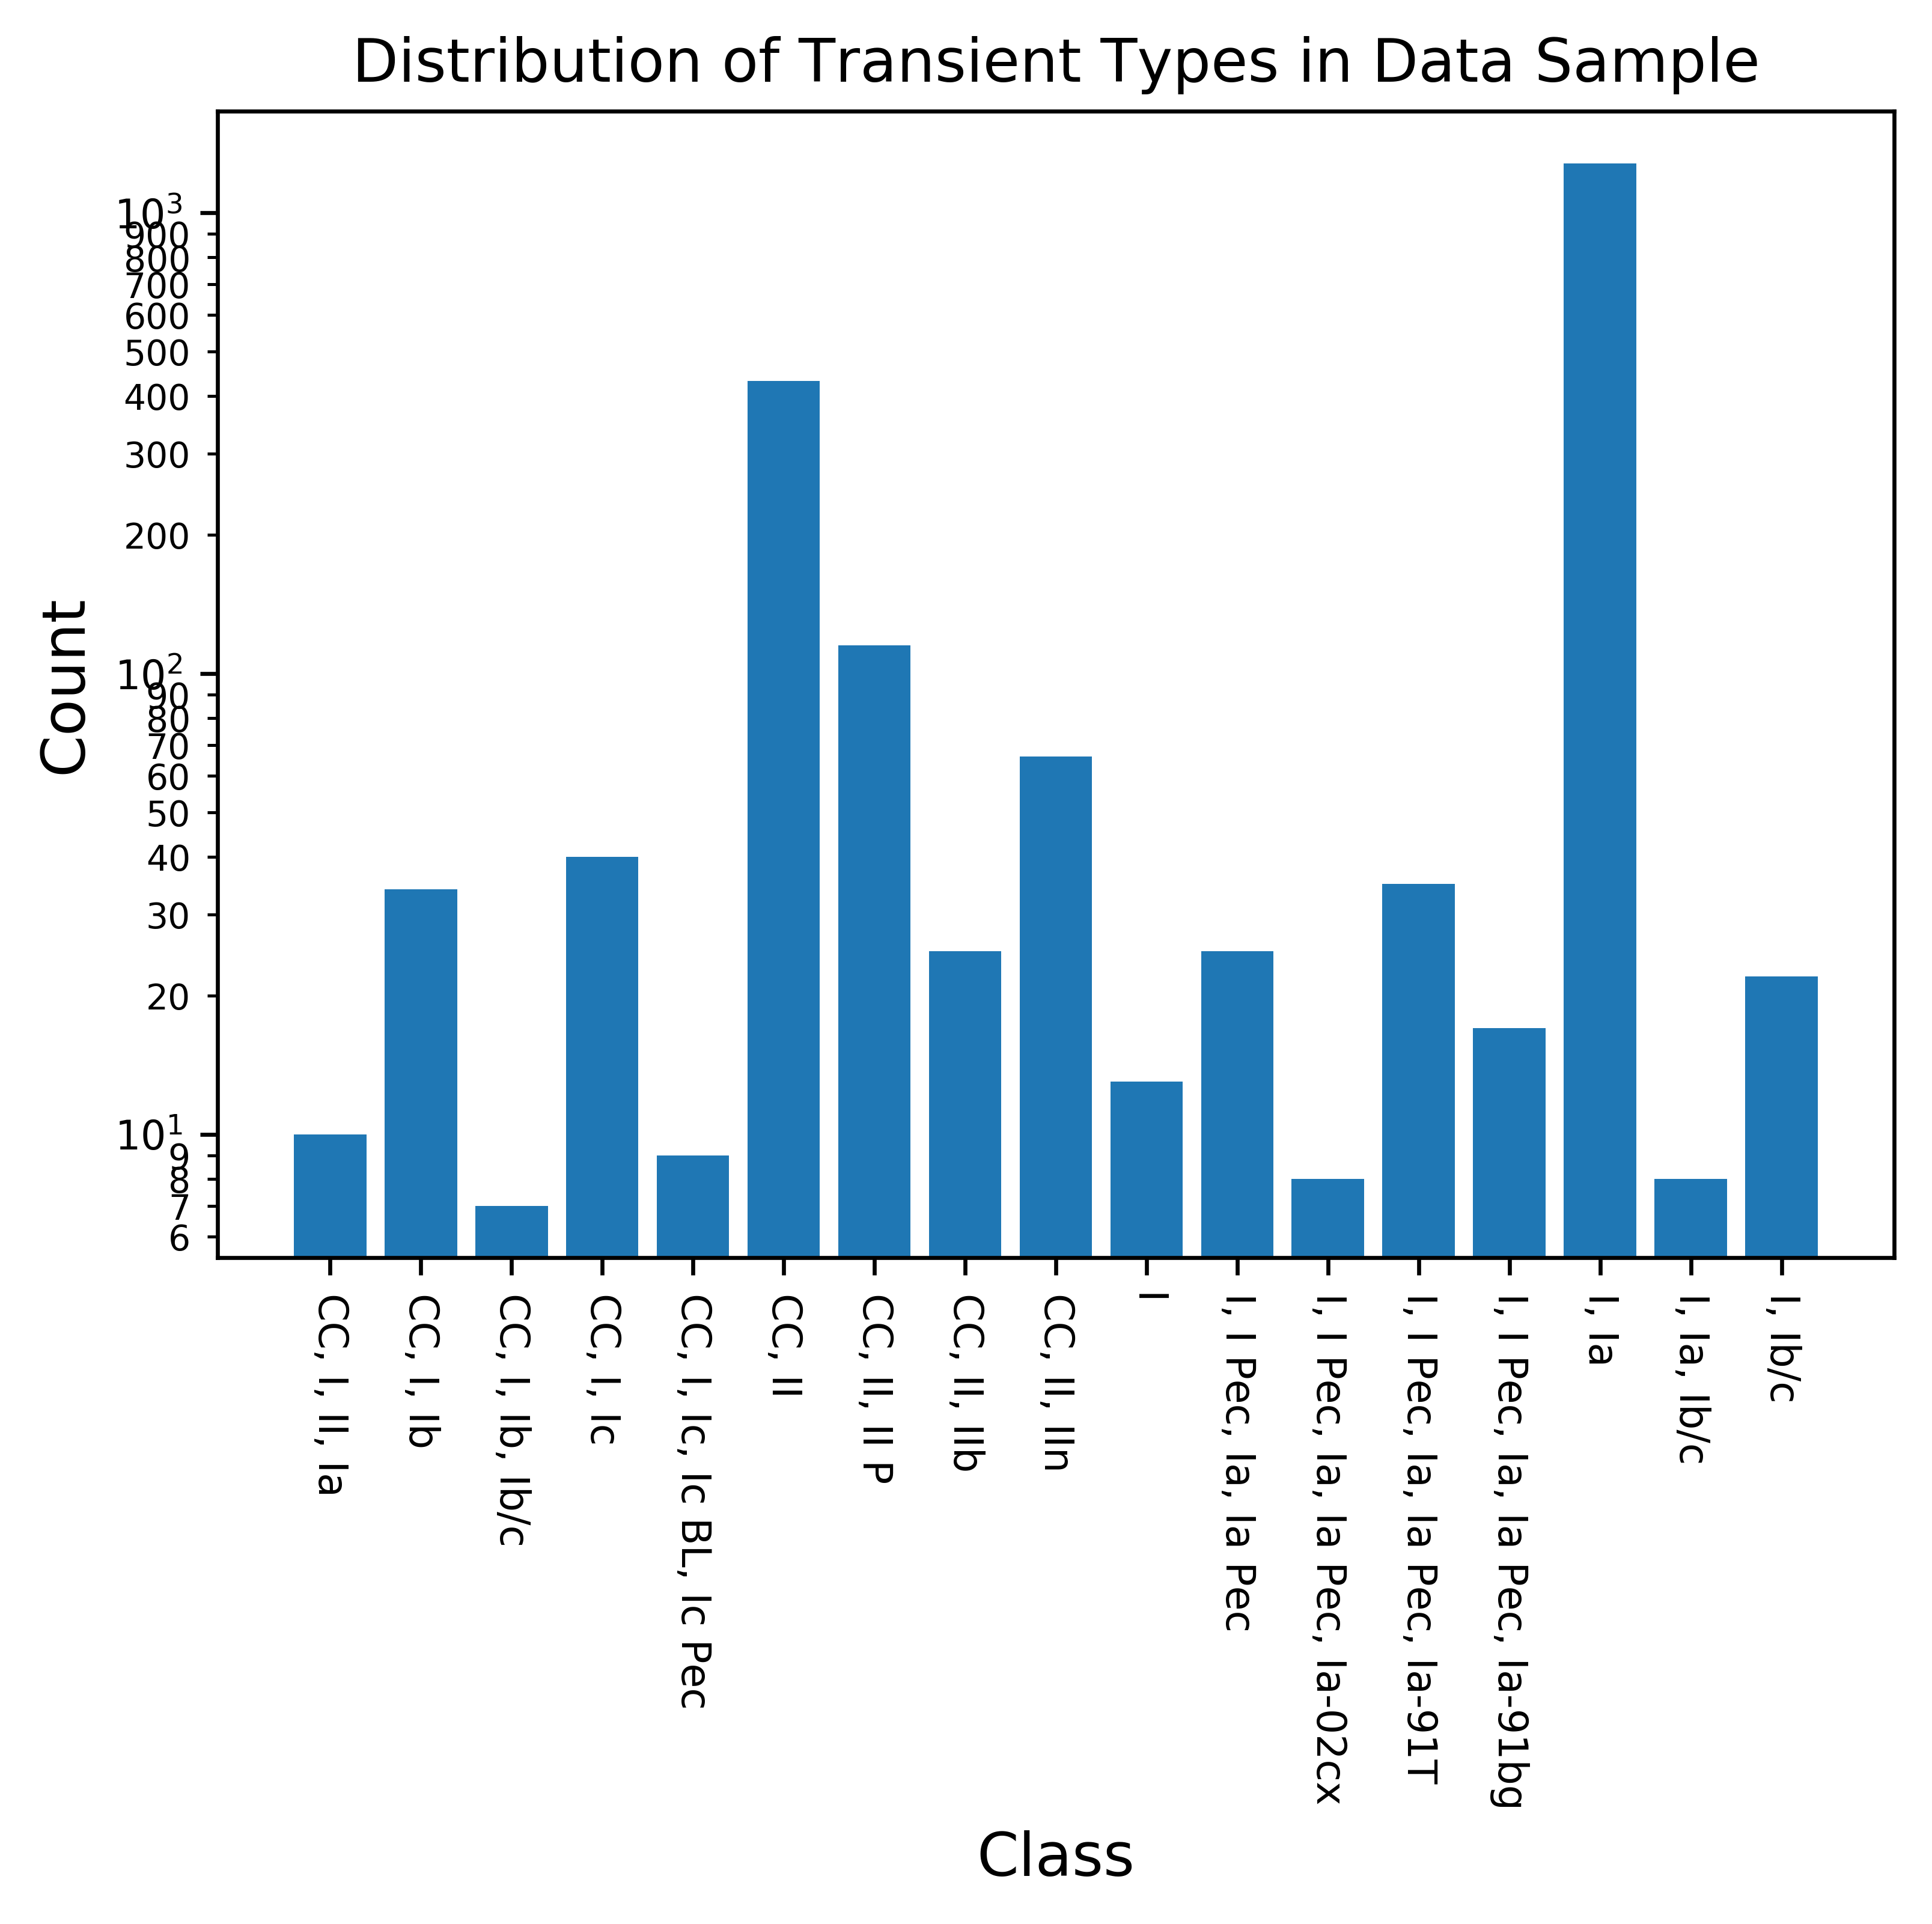

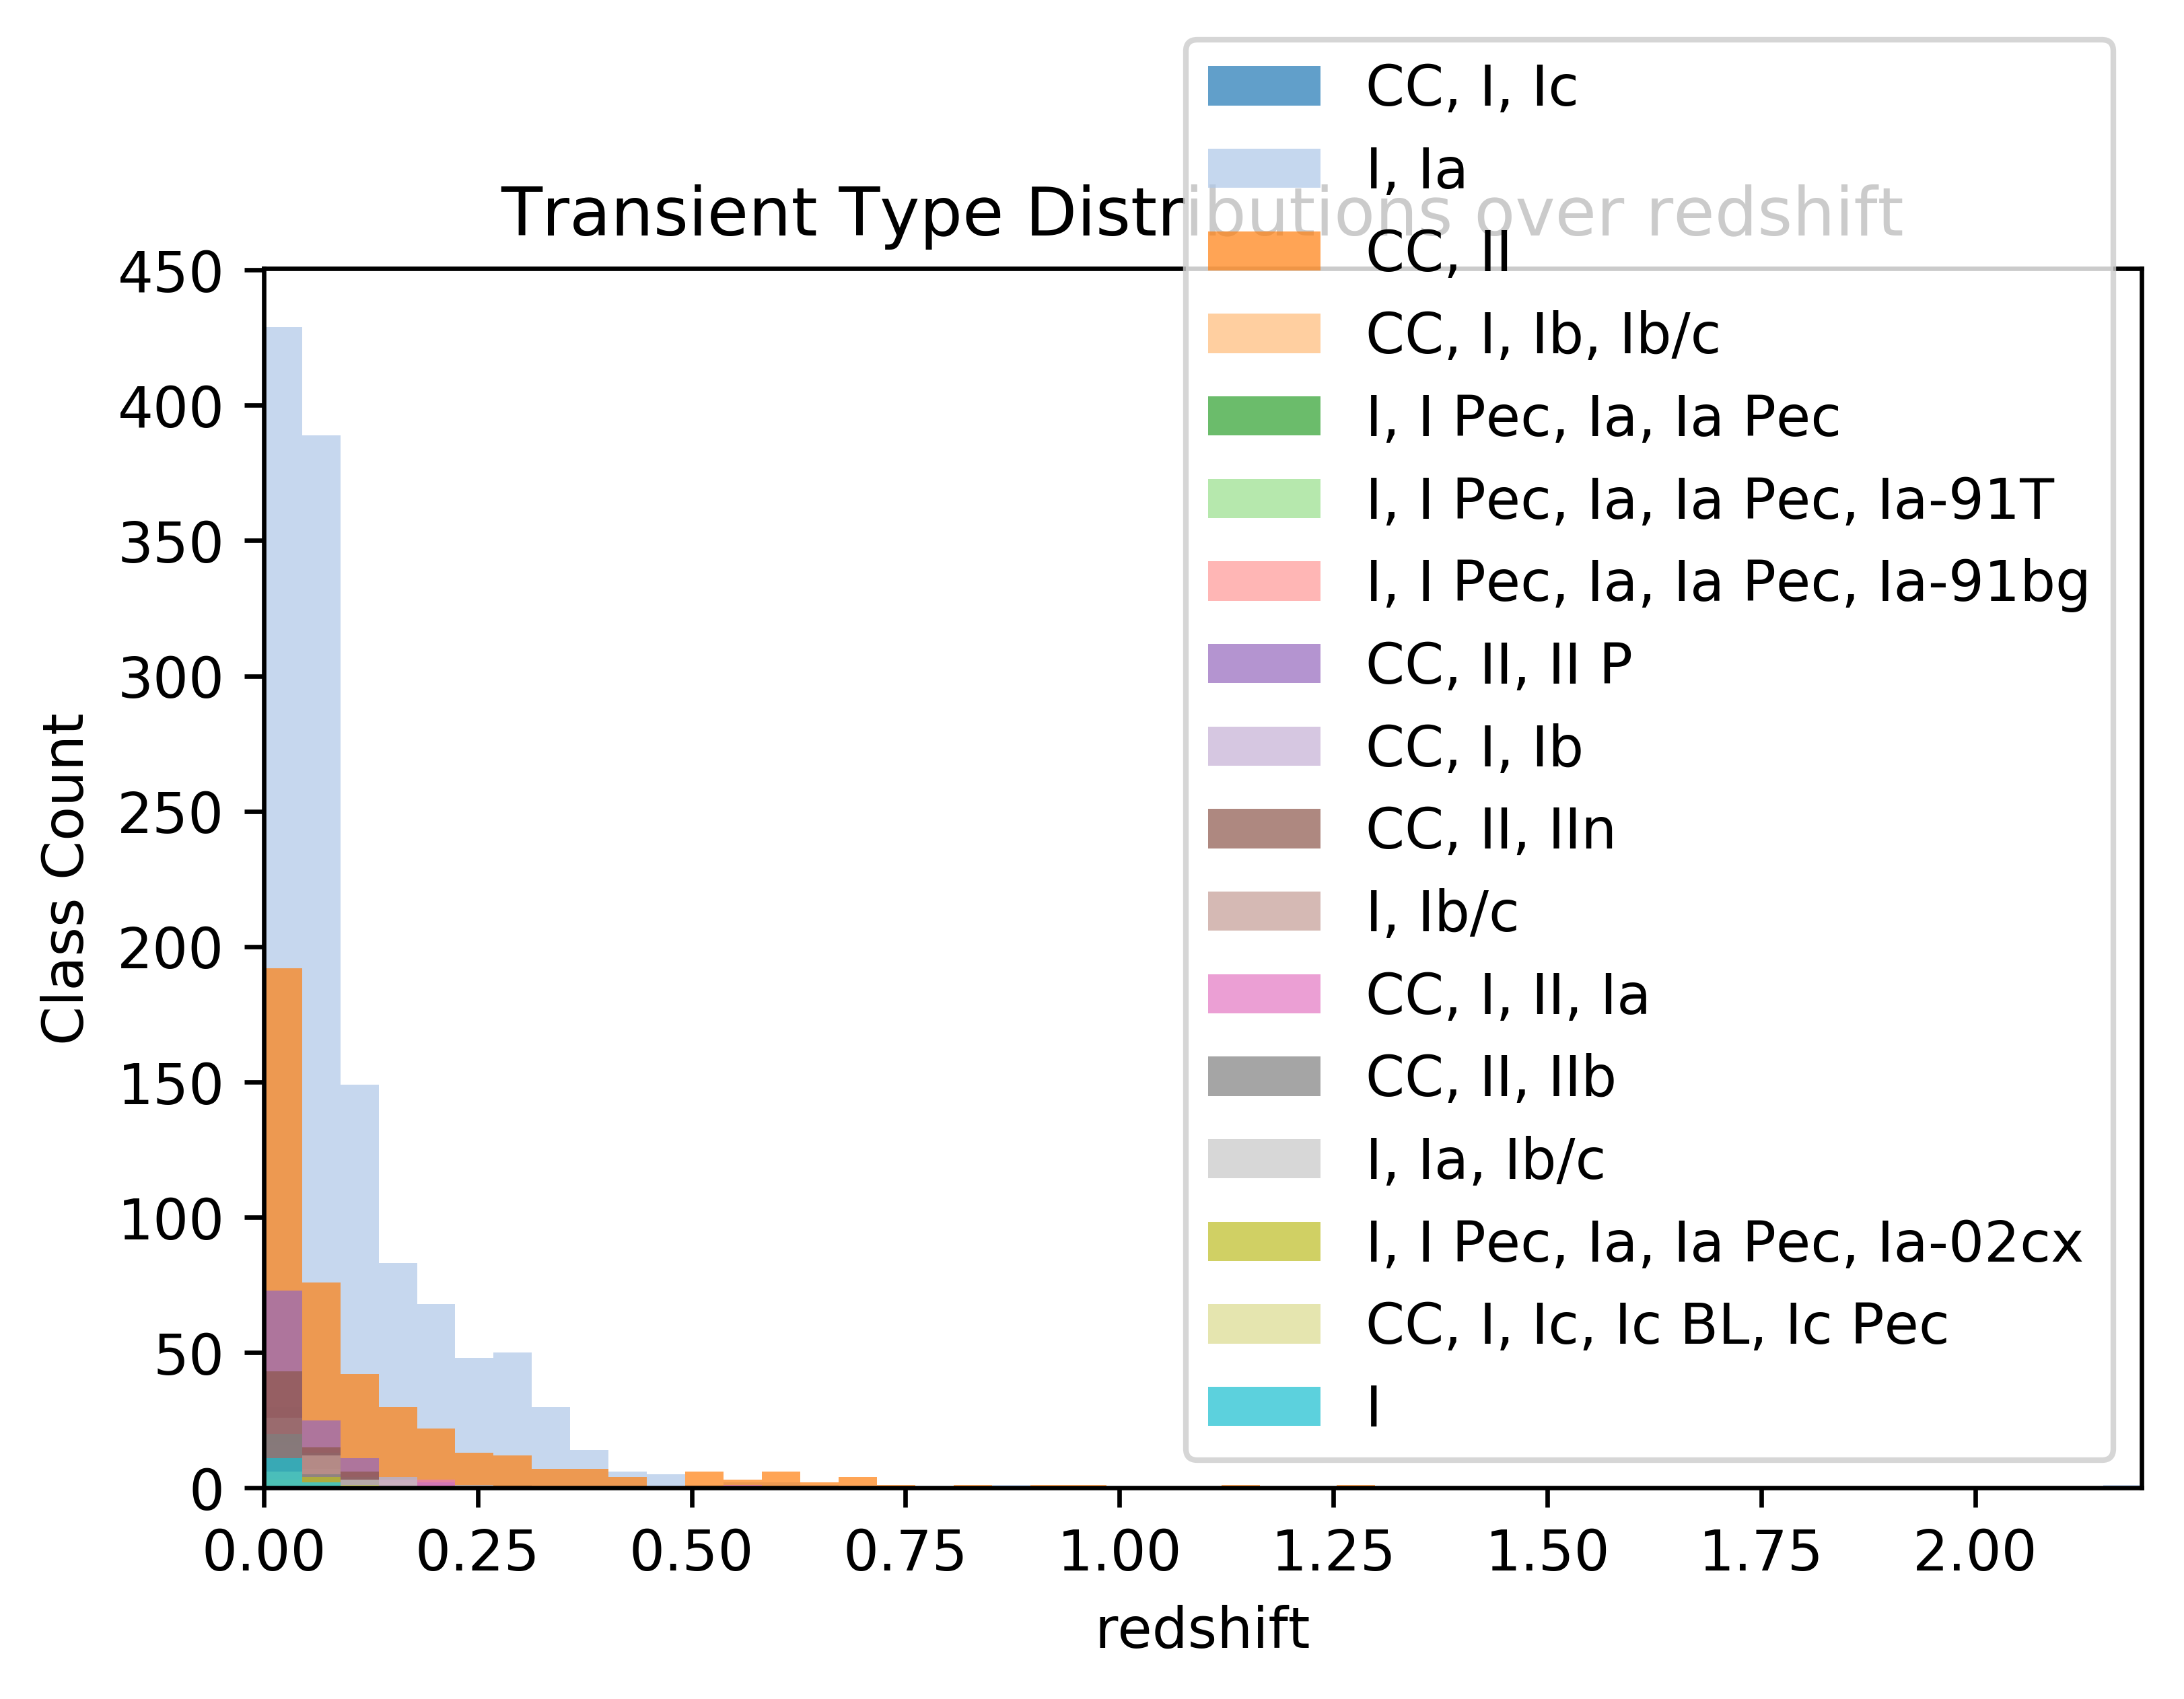



Run 1


ValueError: 'brier_score_loss' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

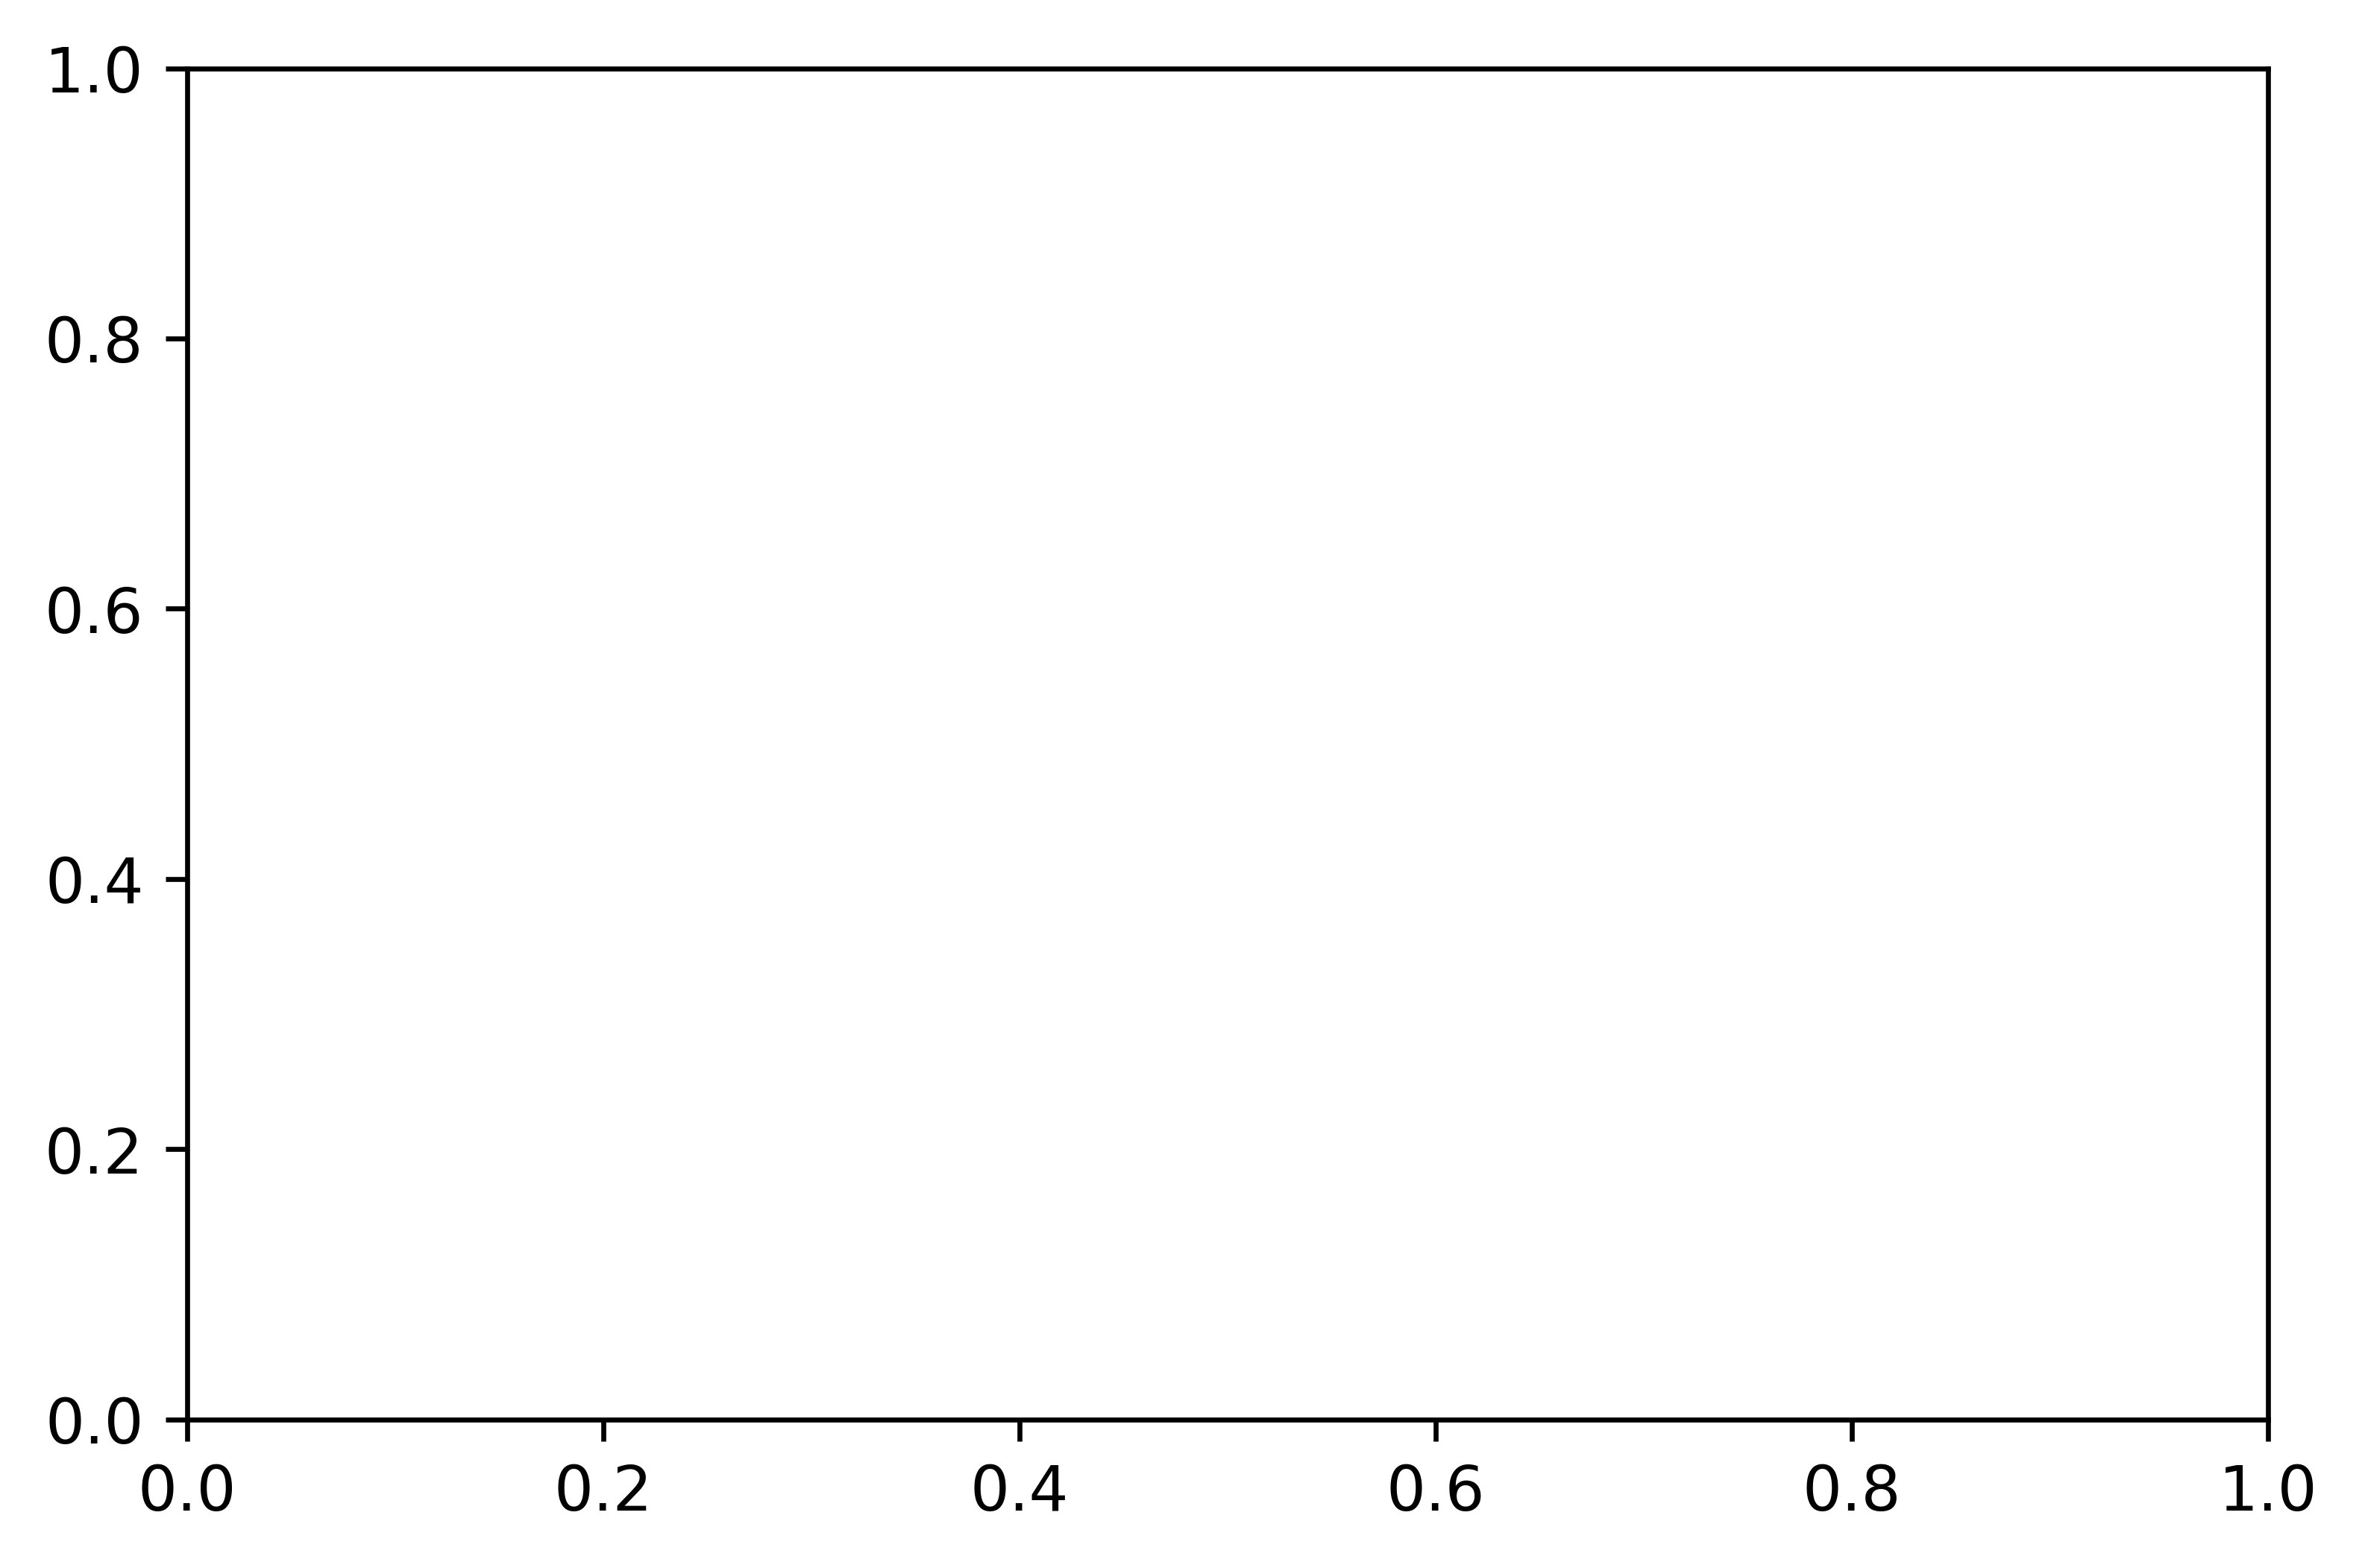

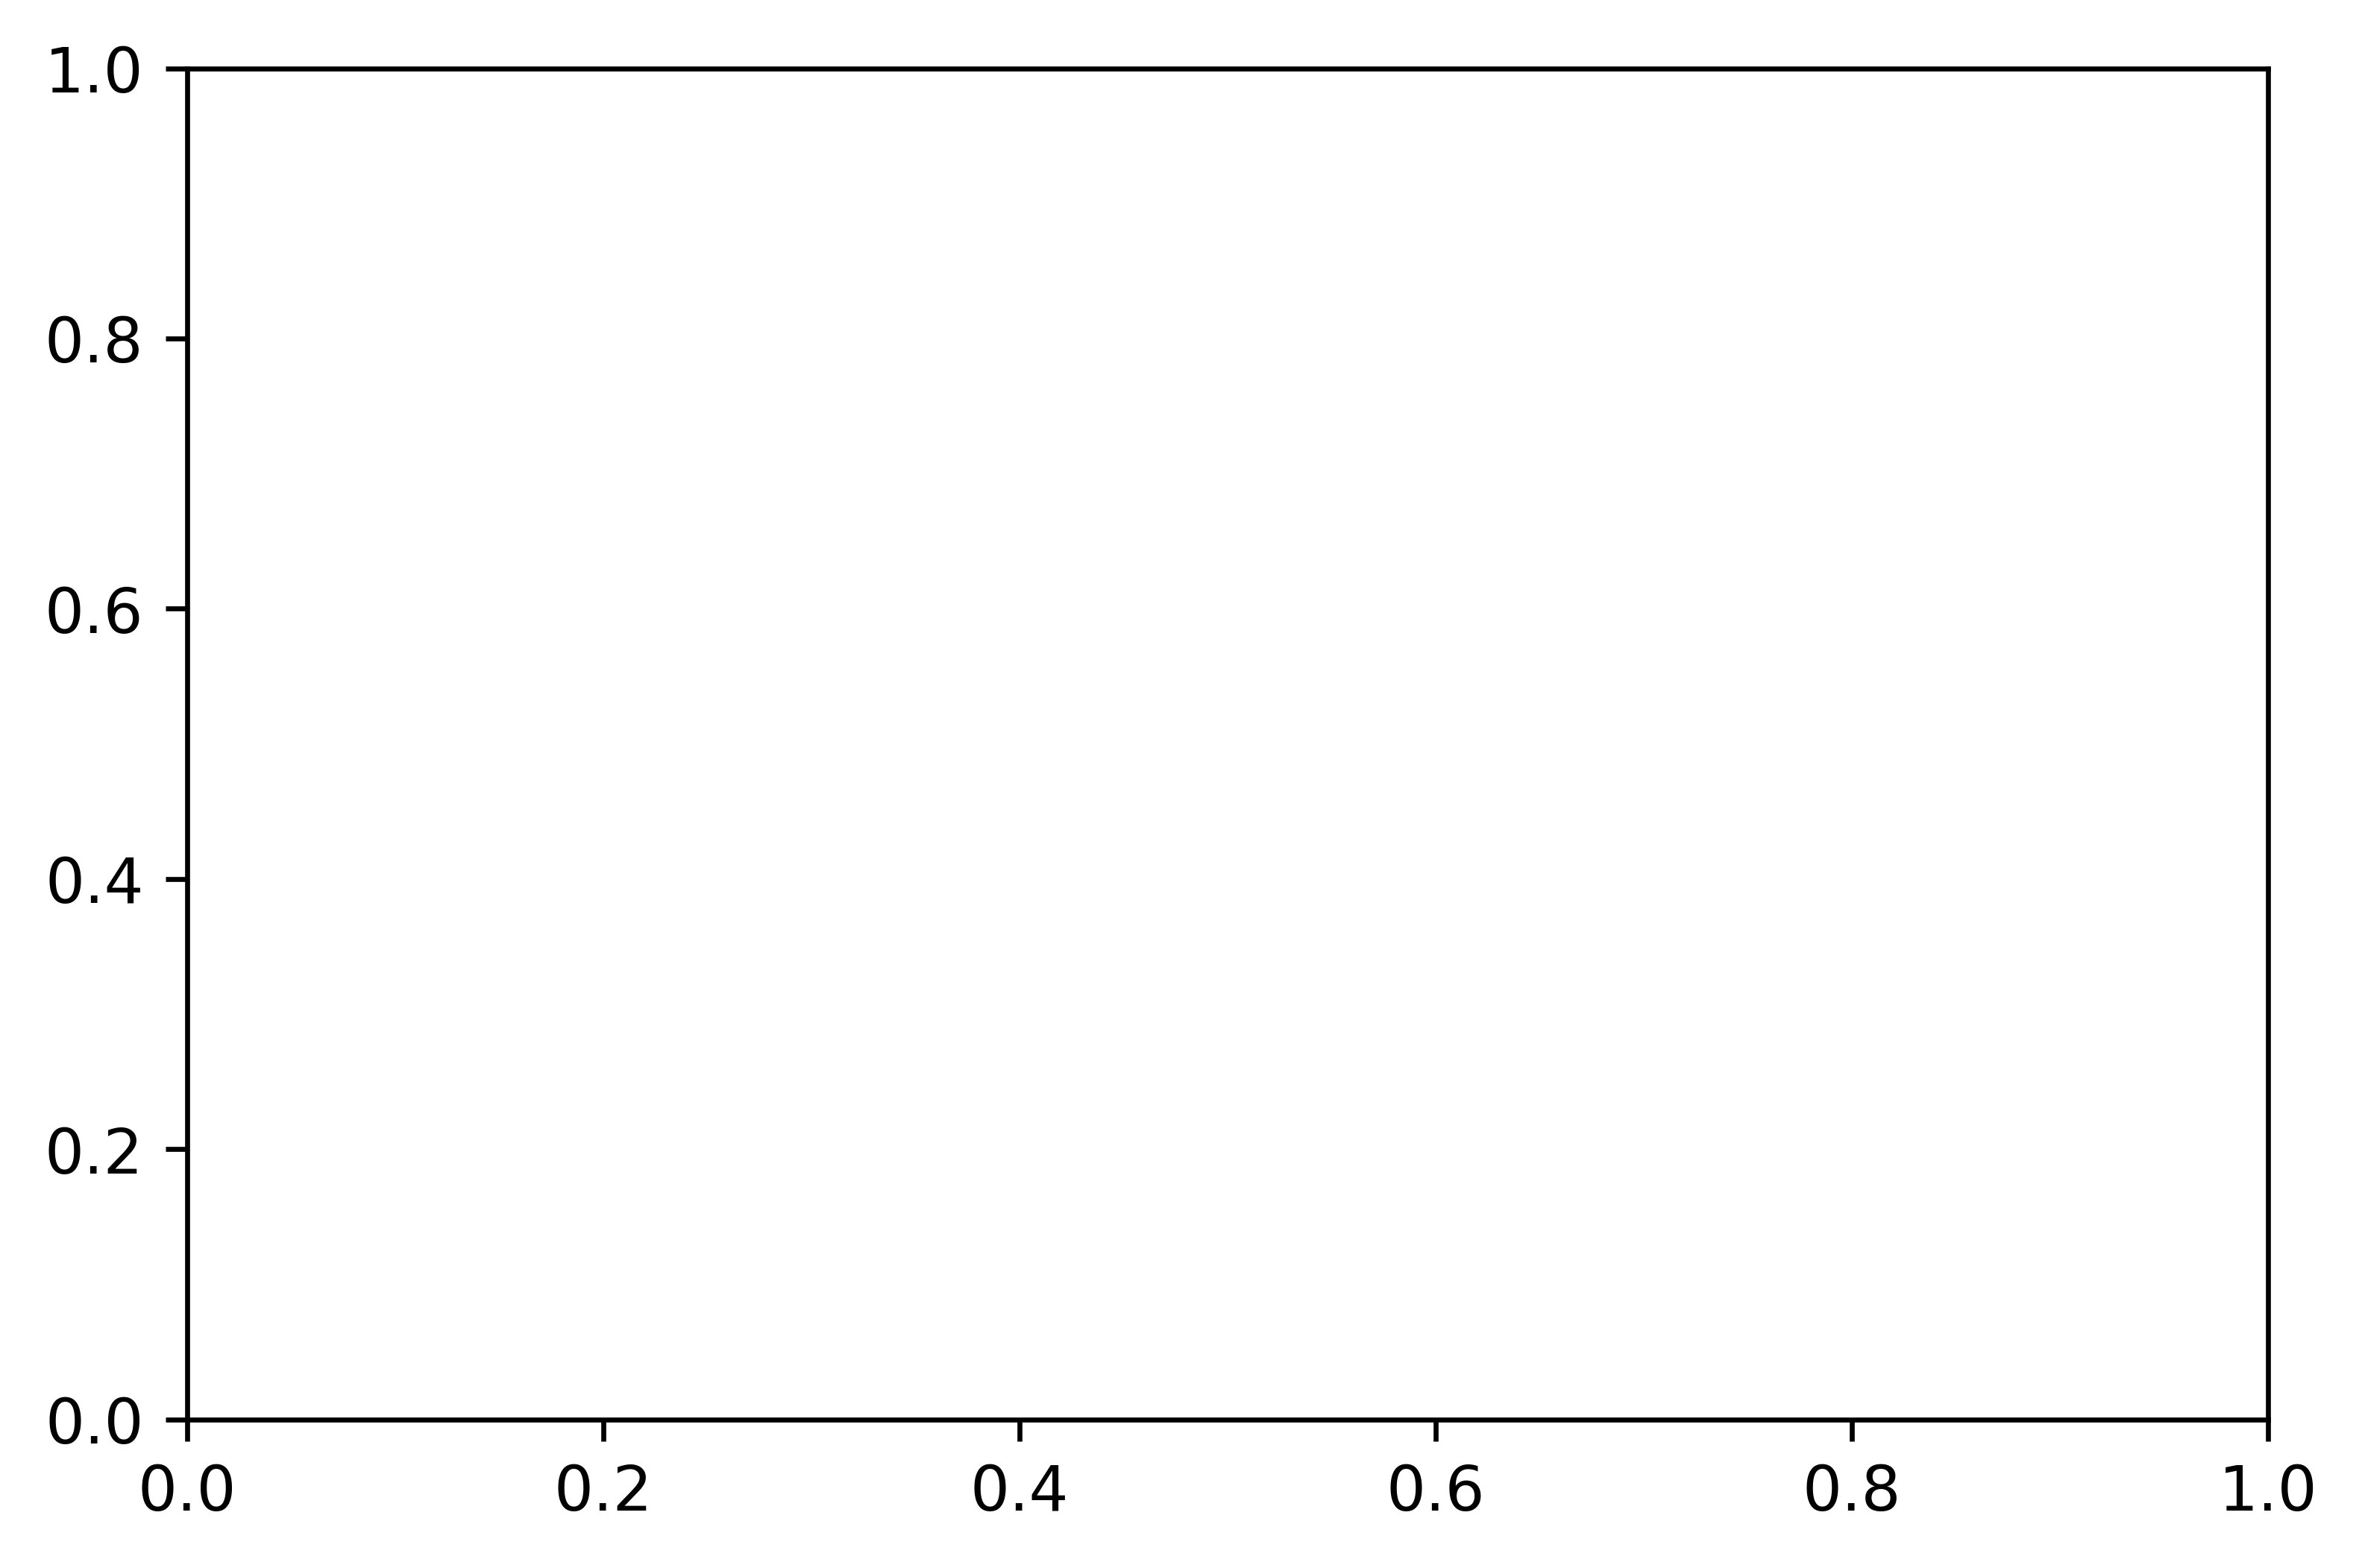

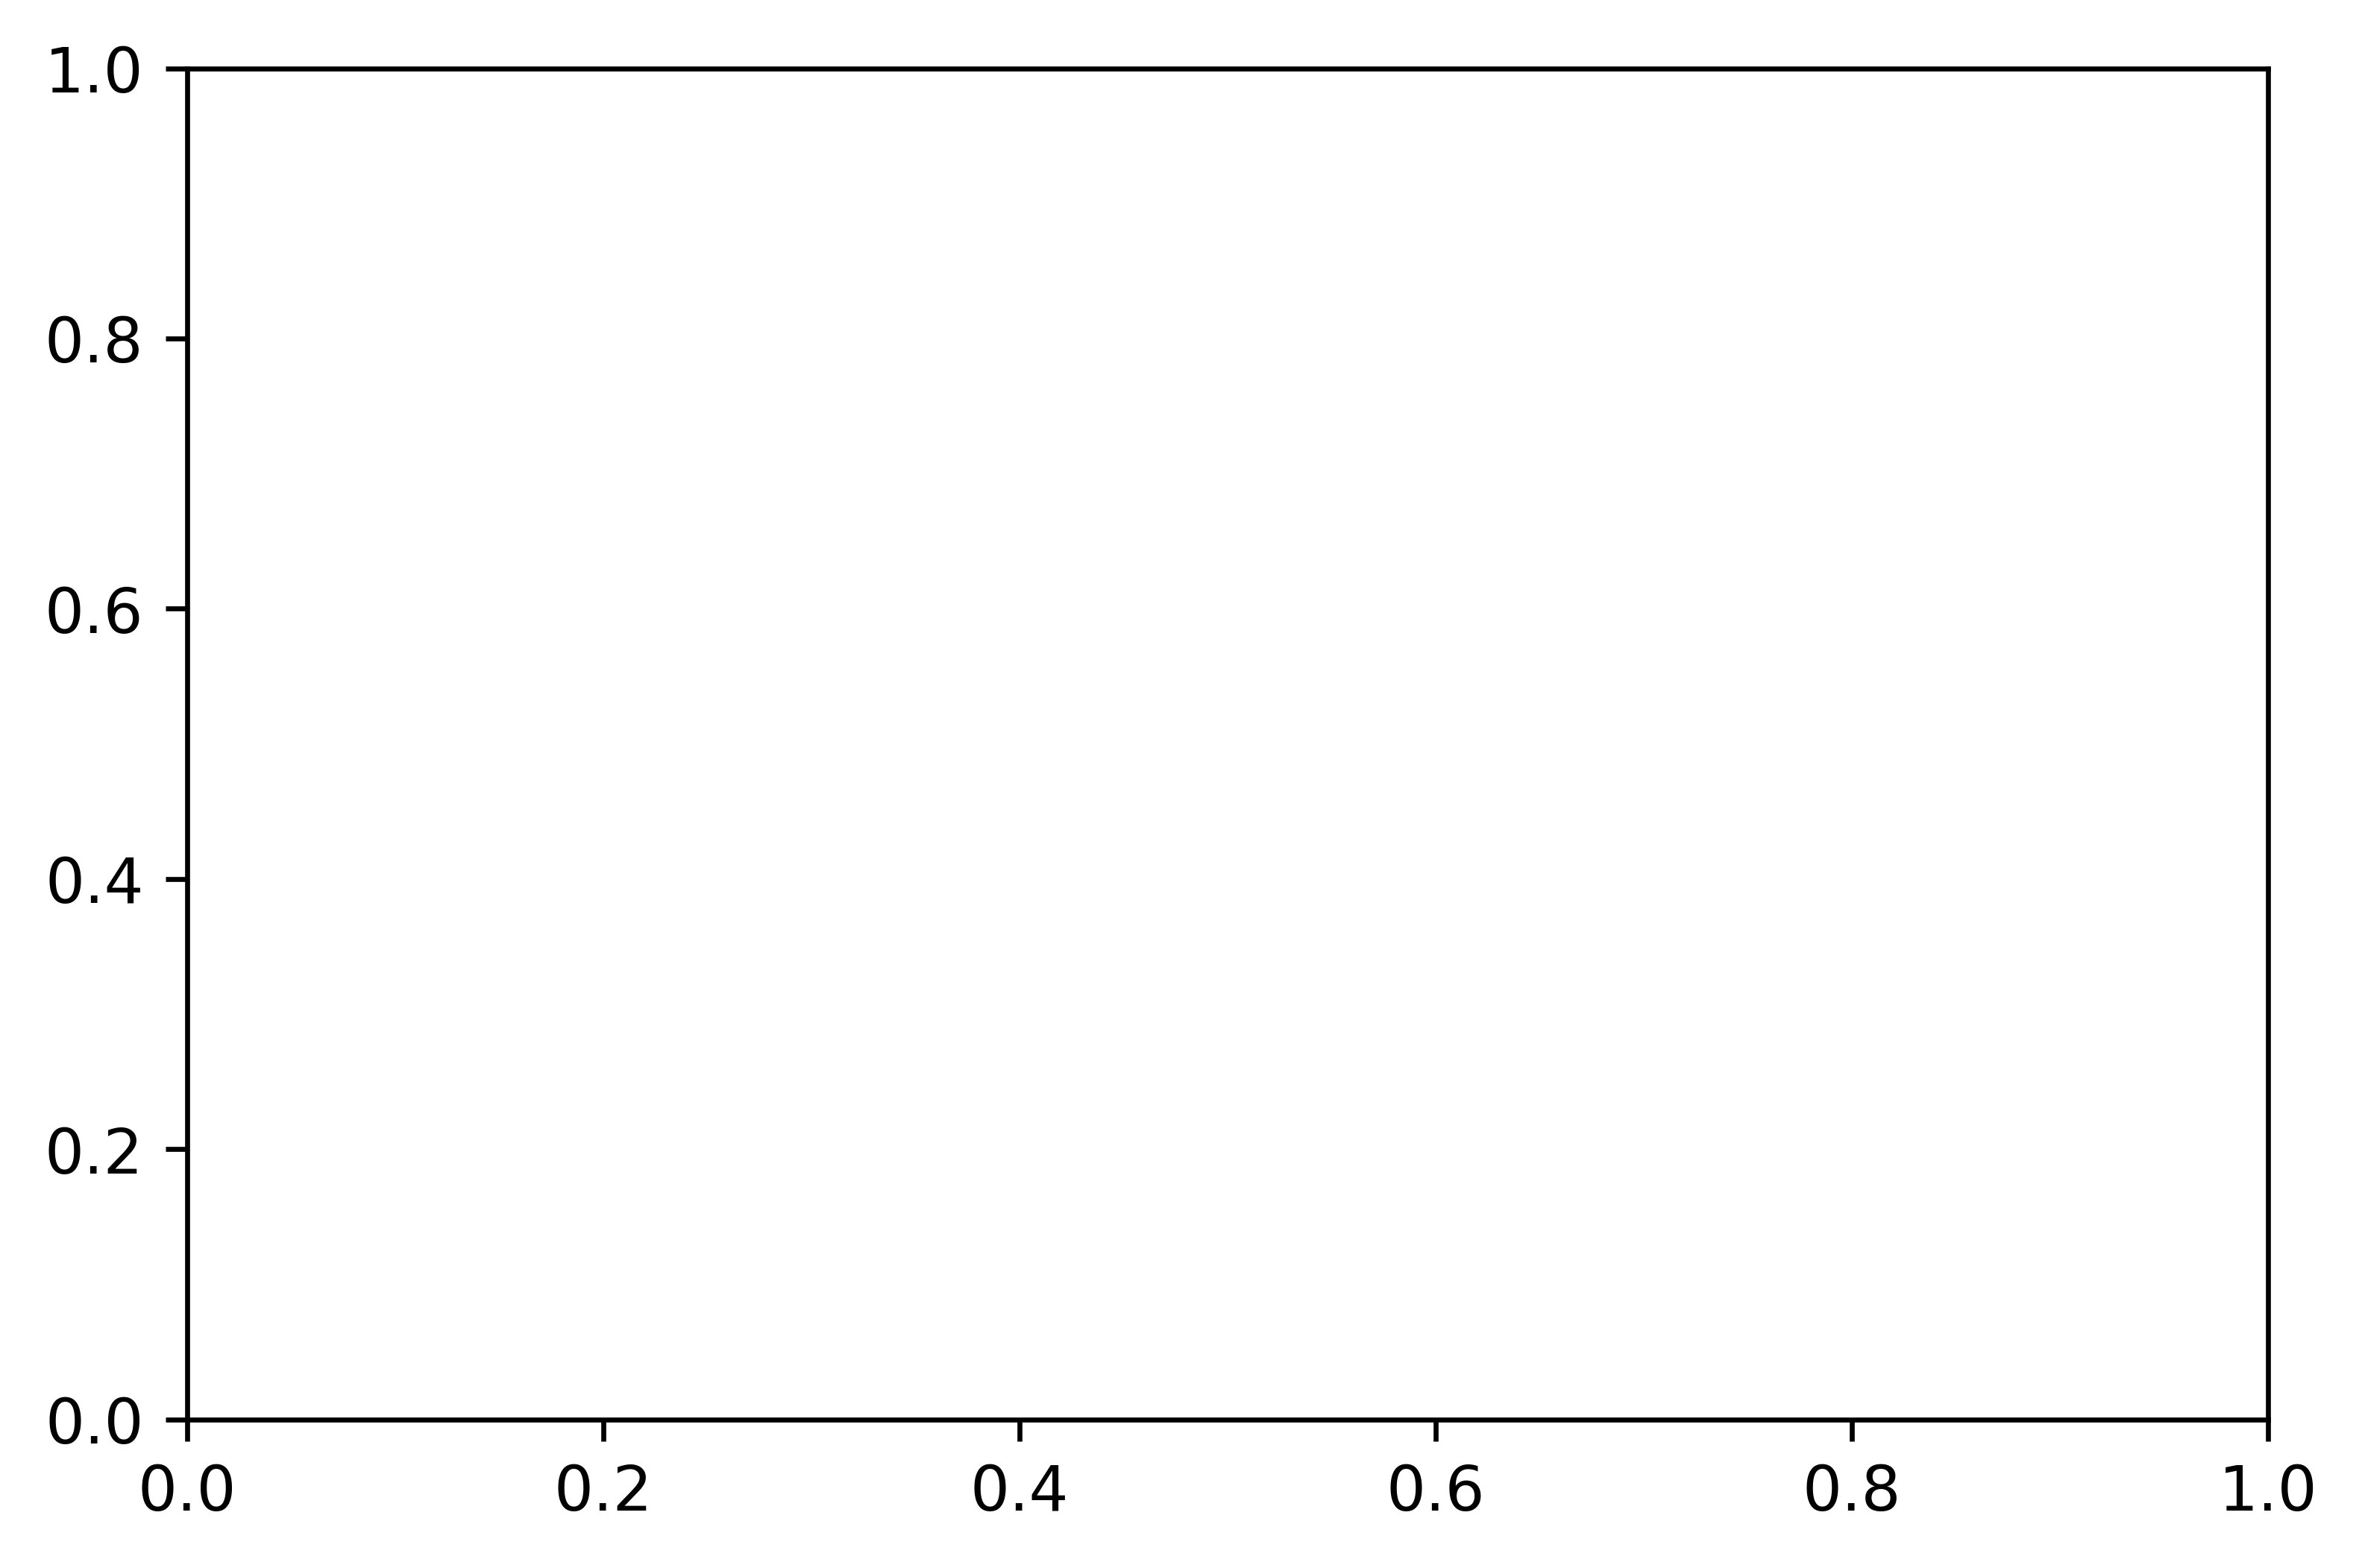

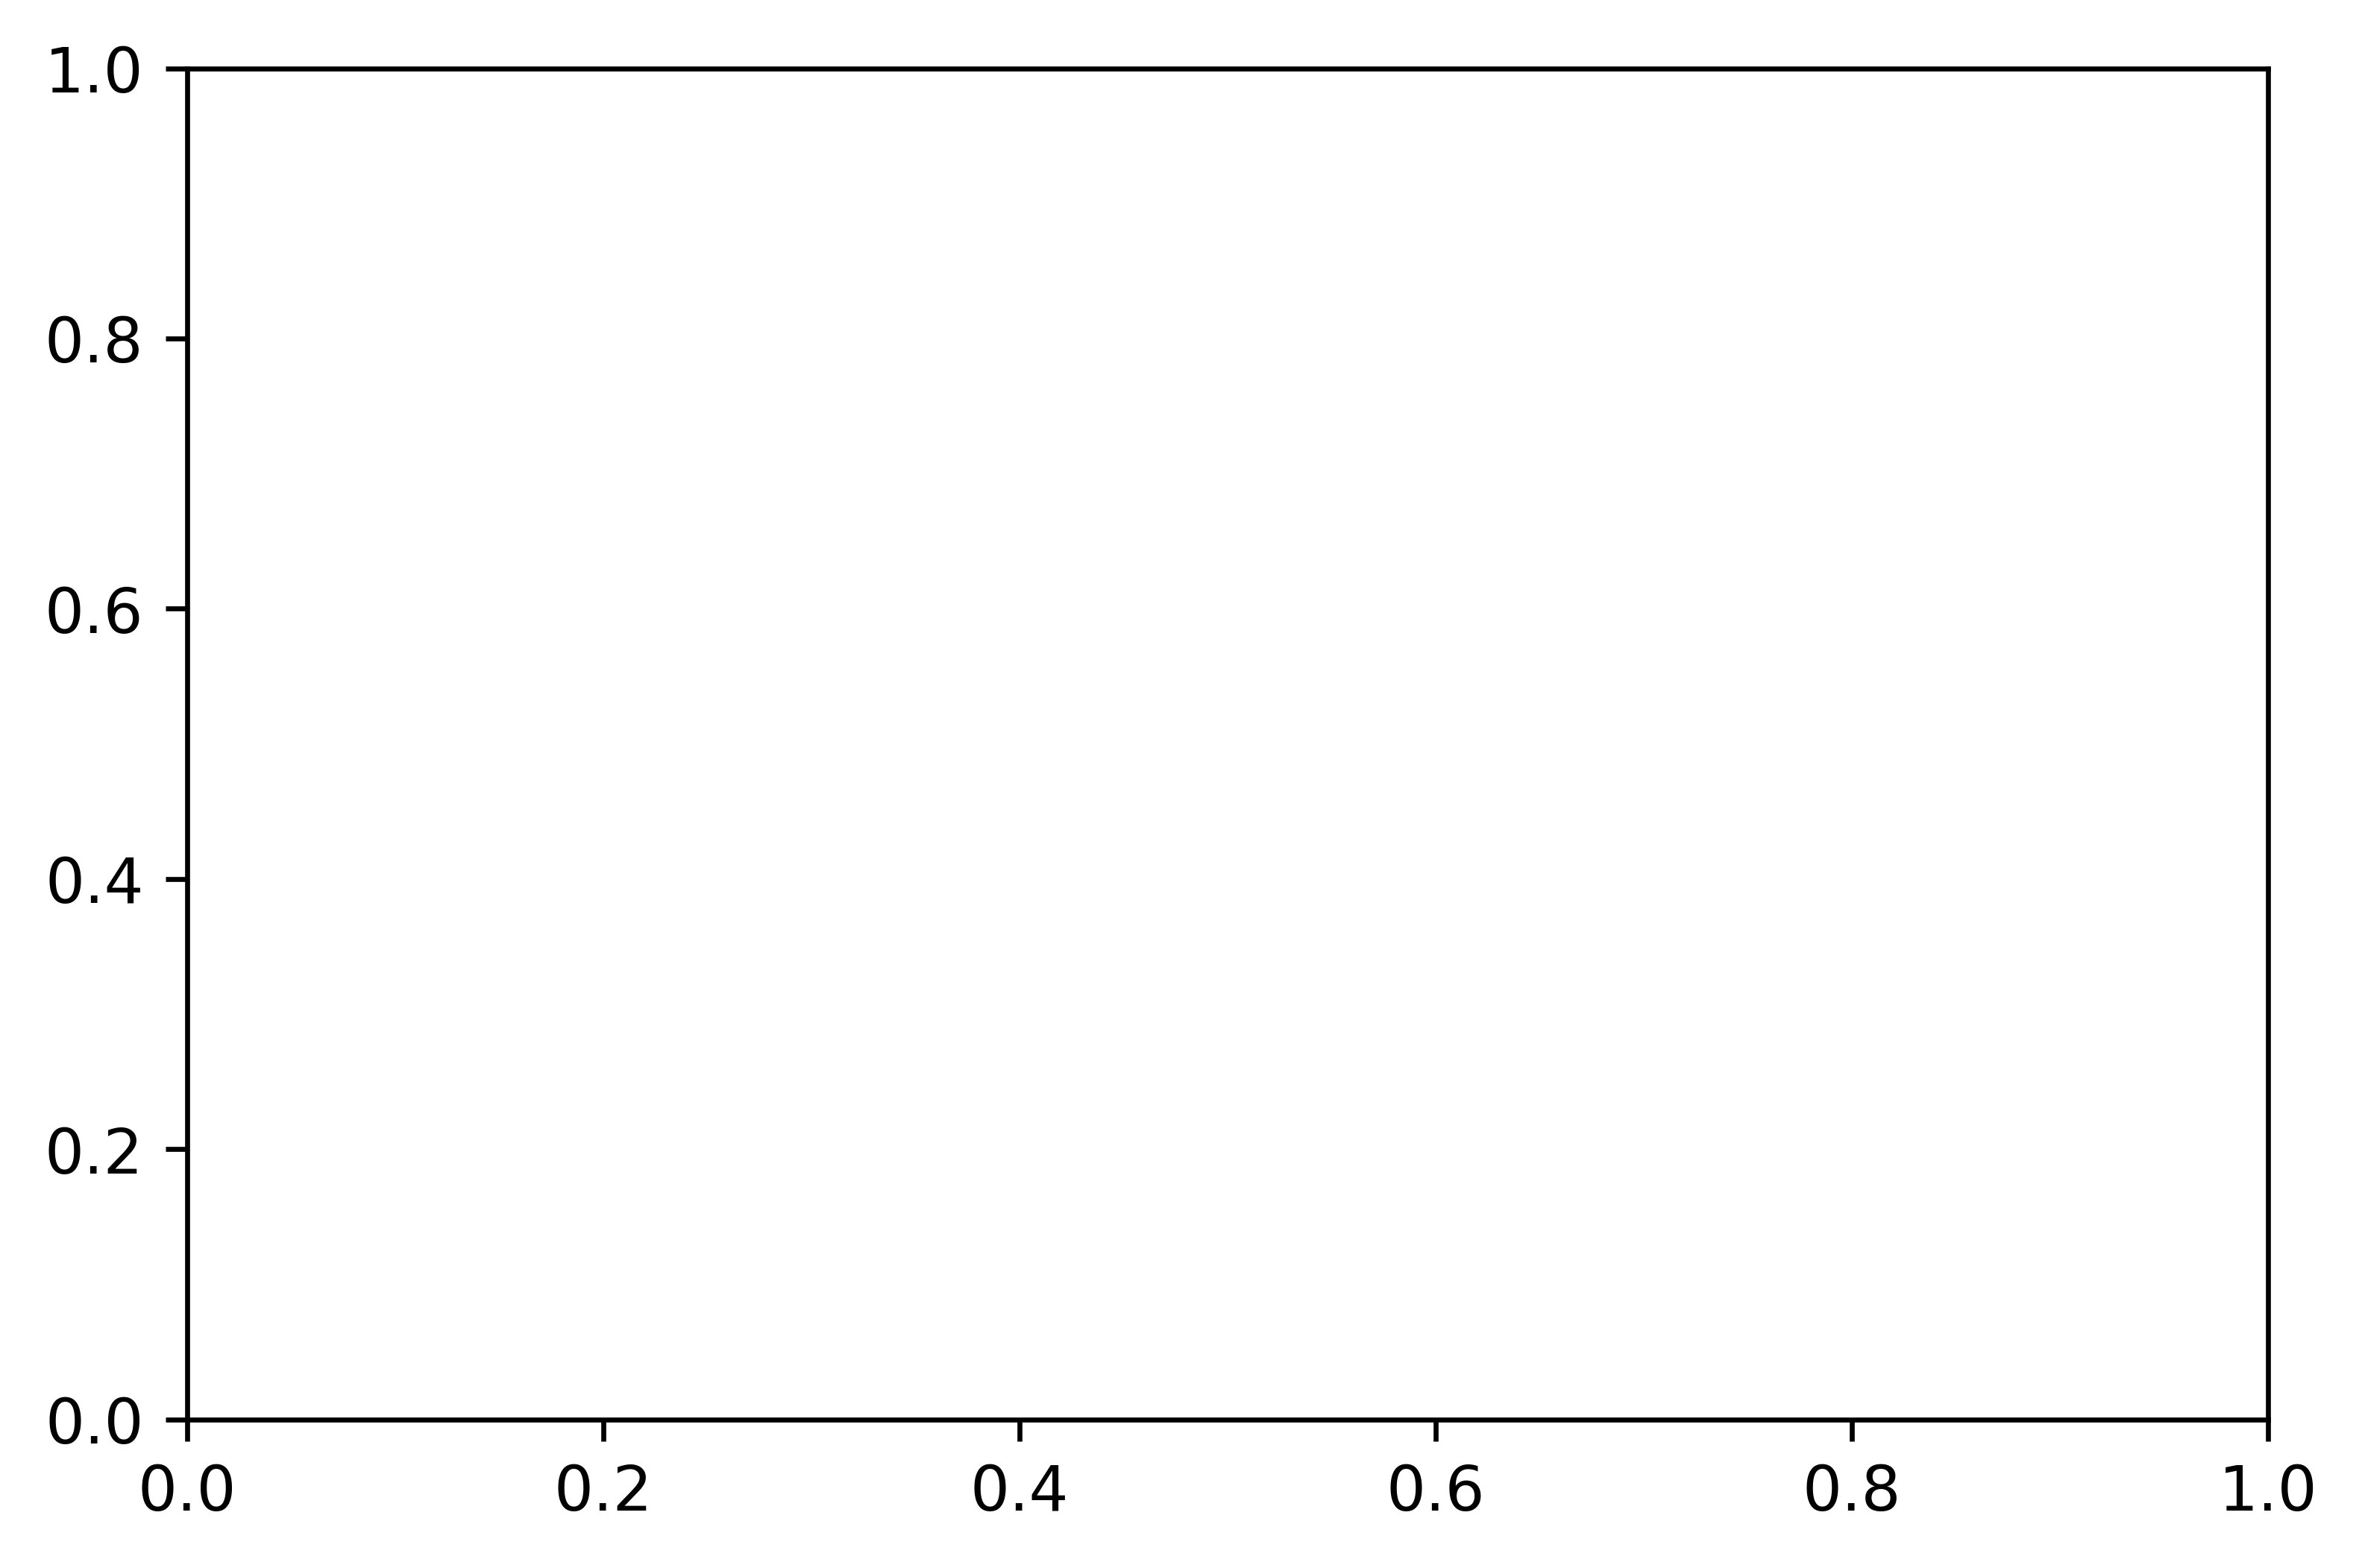

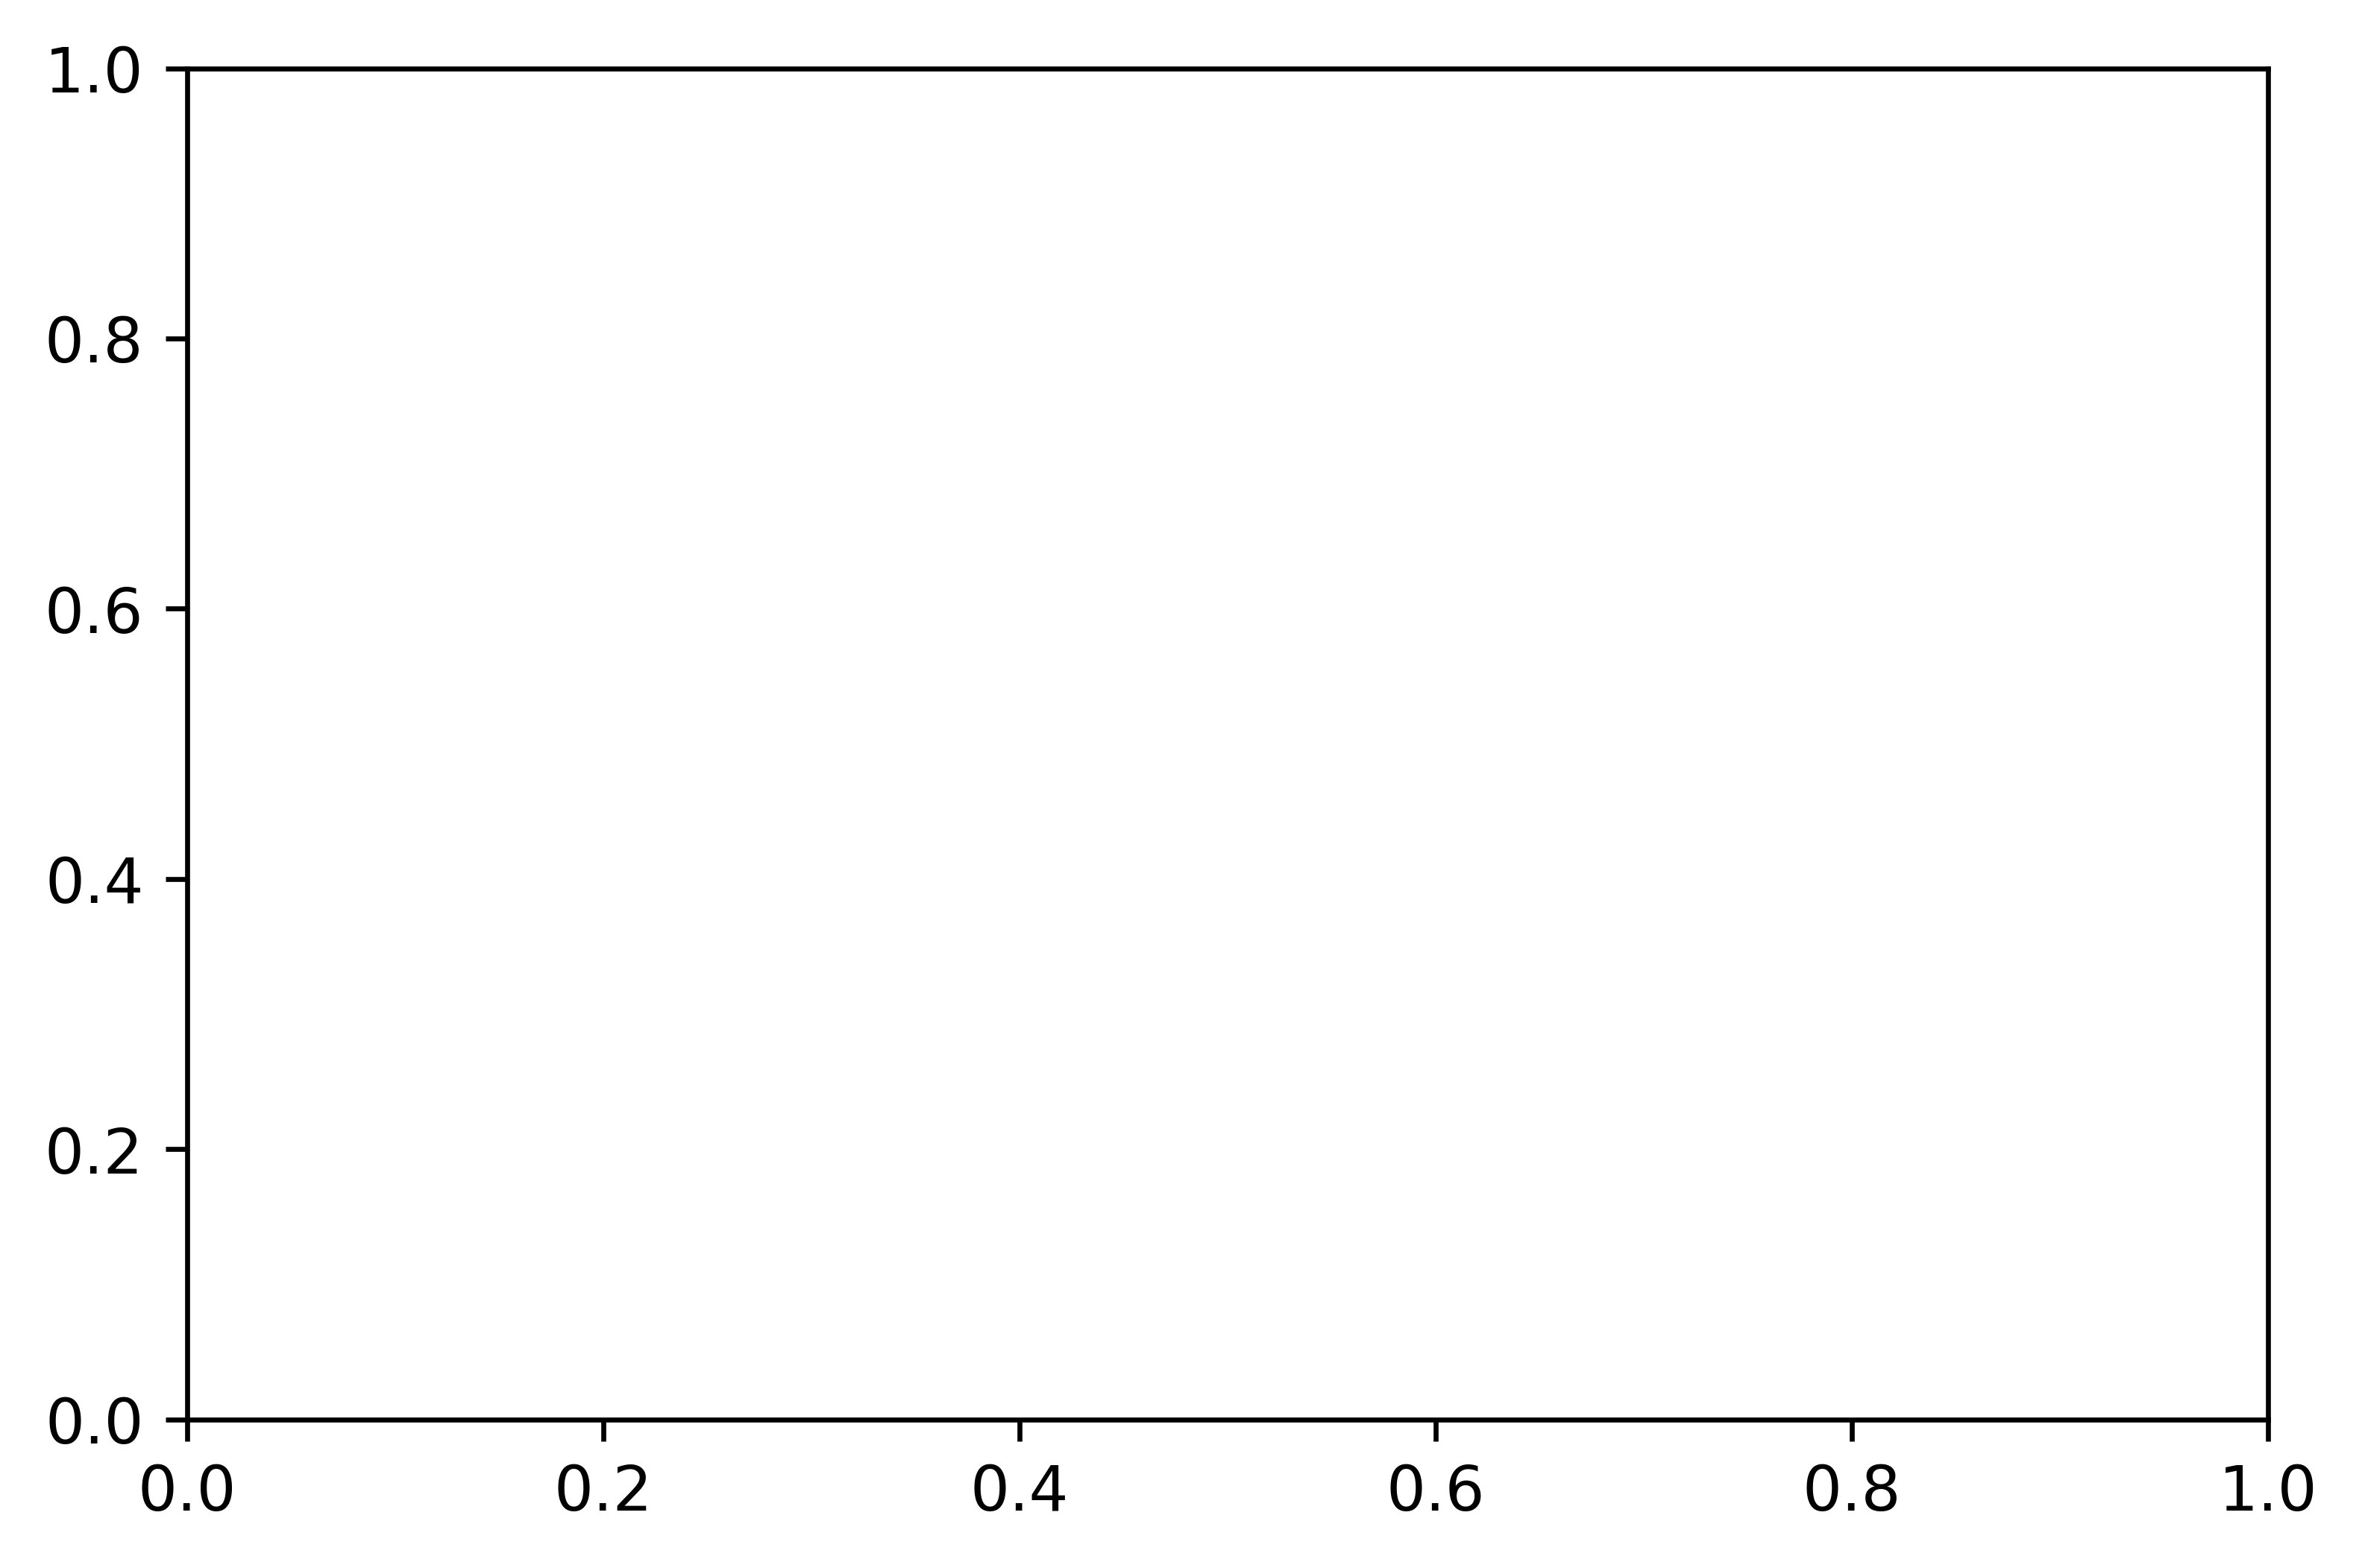

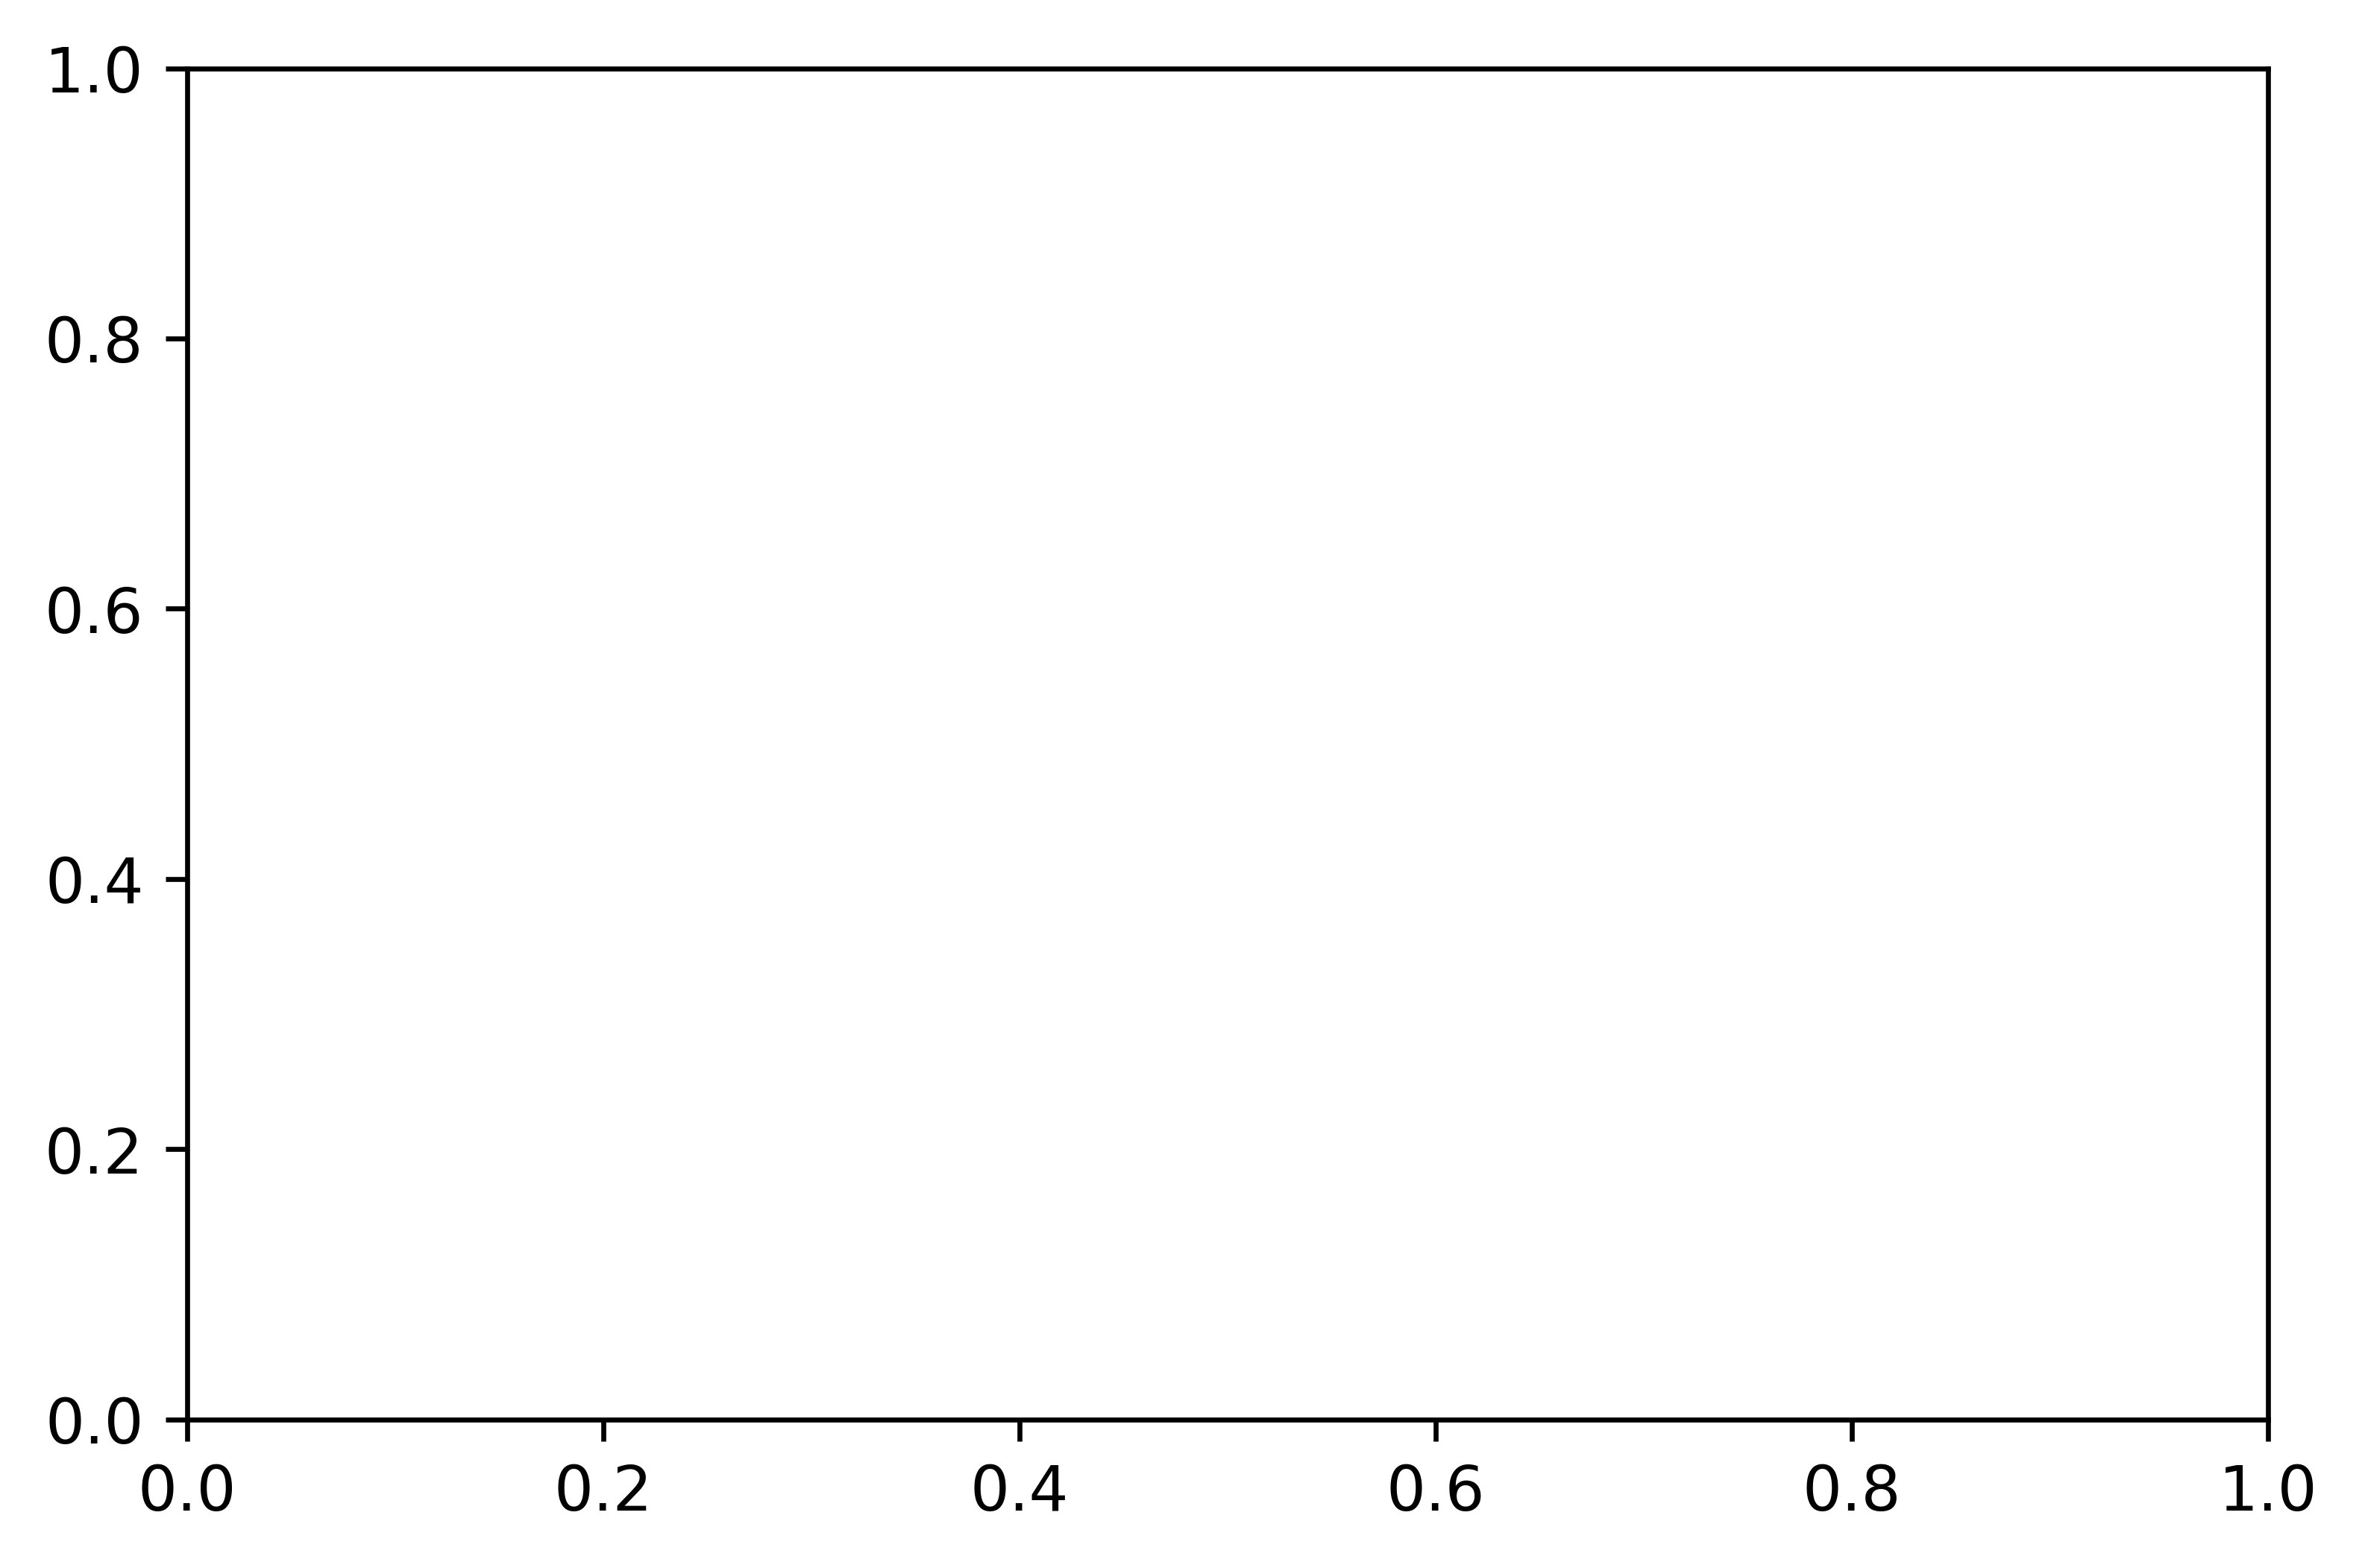

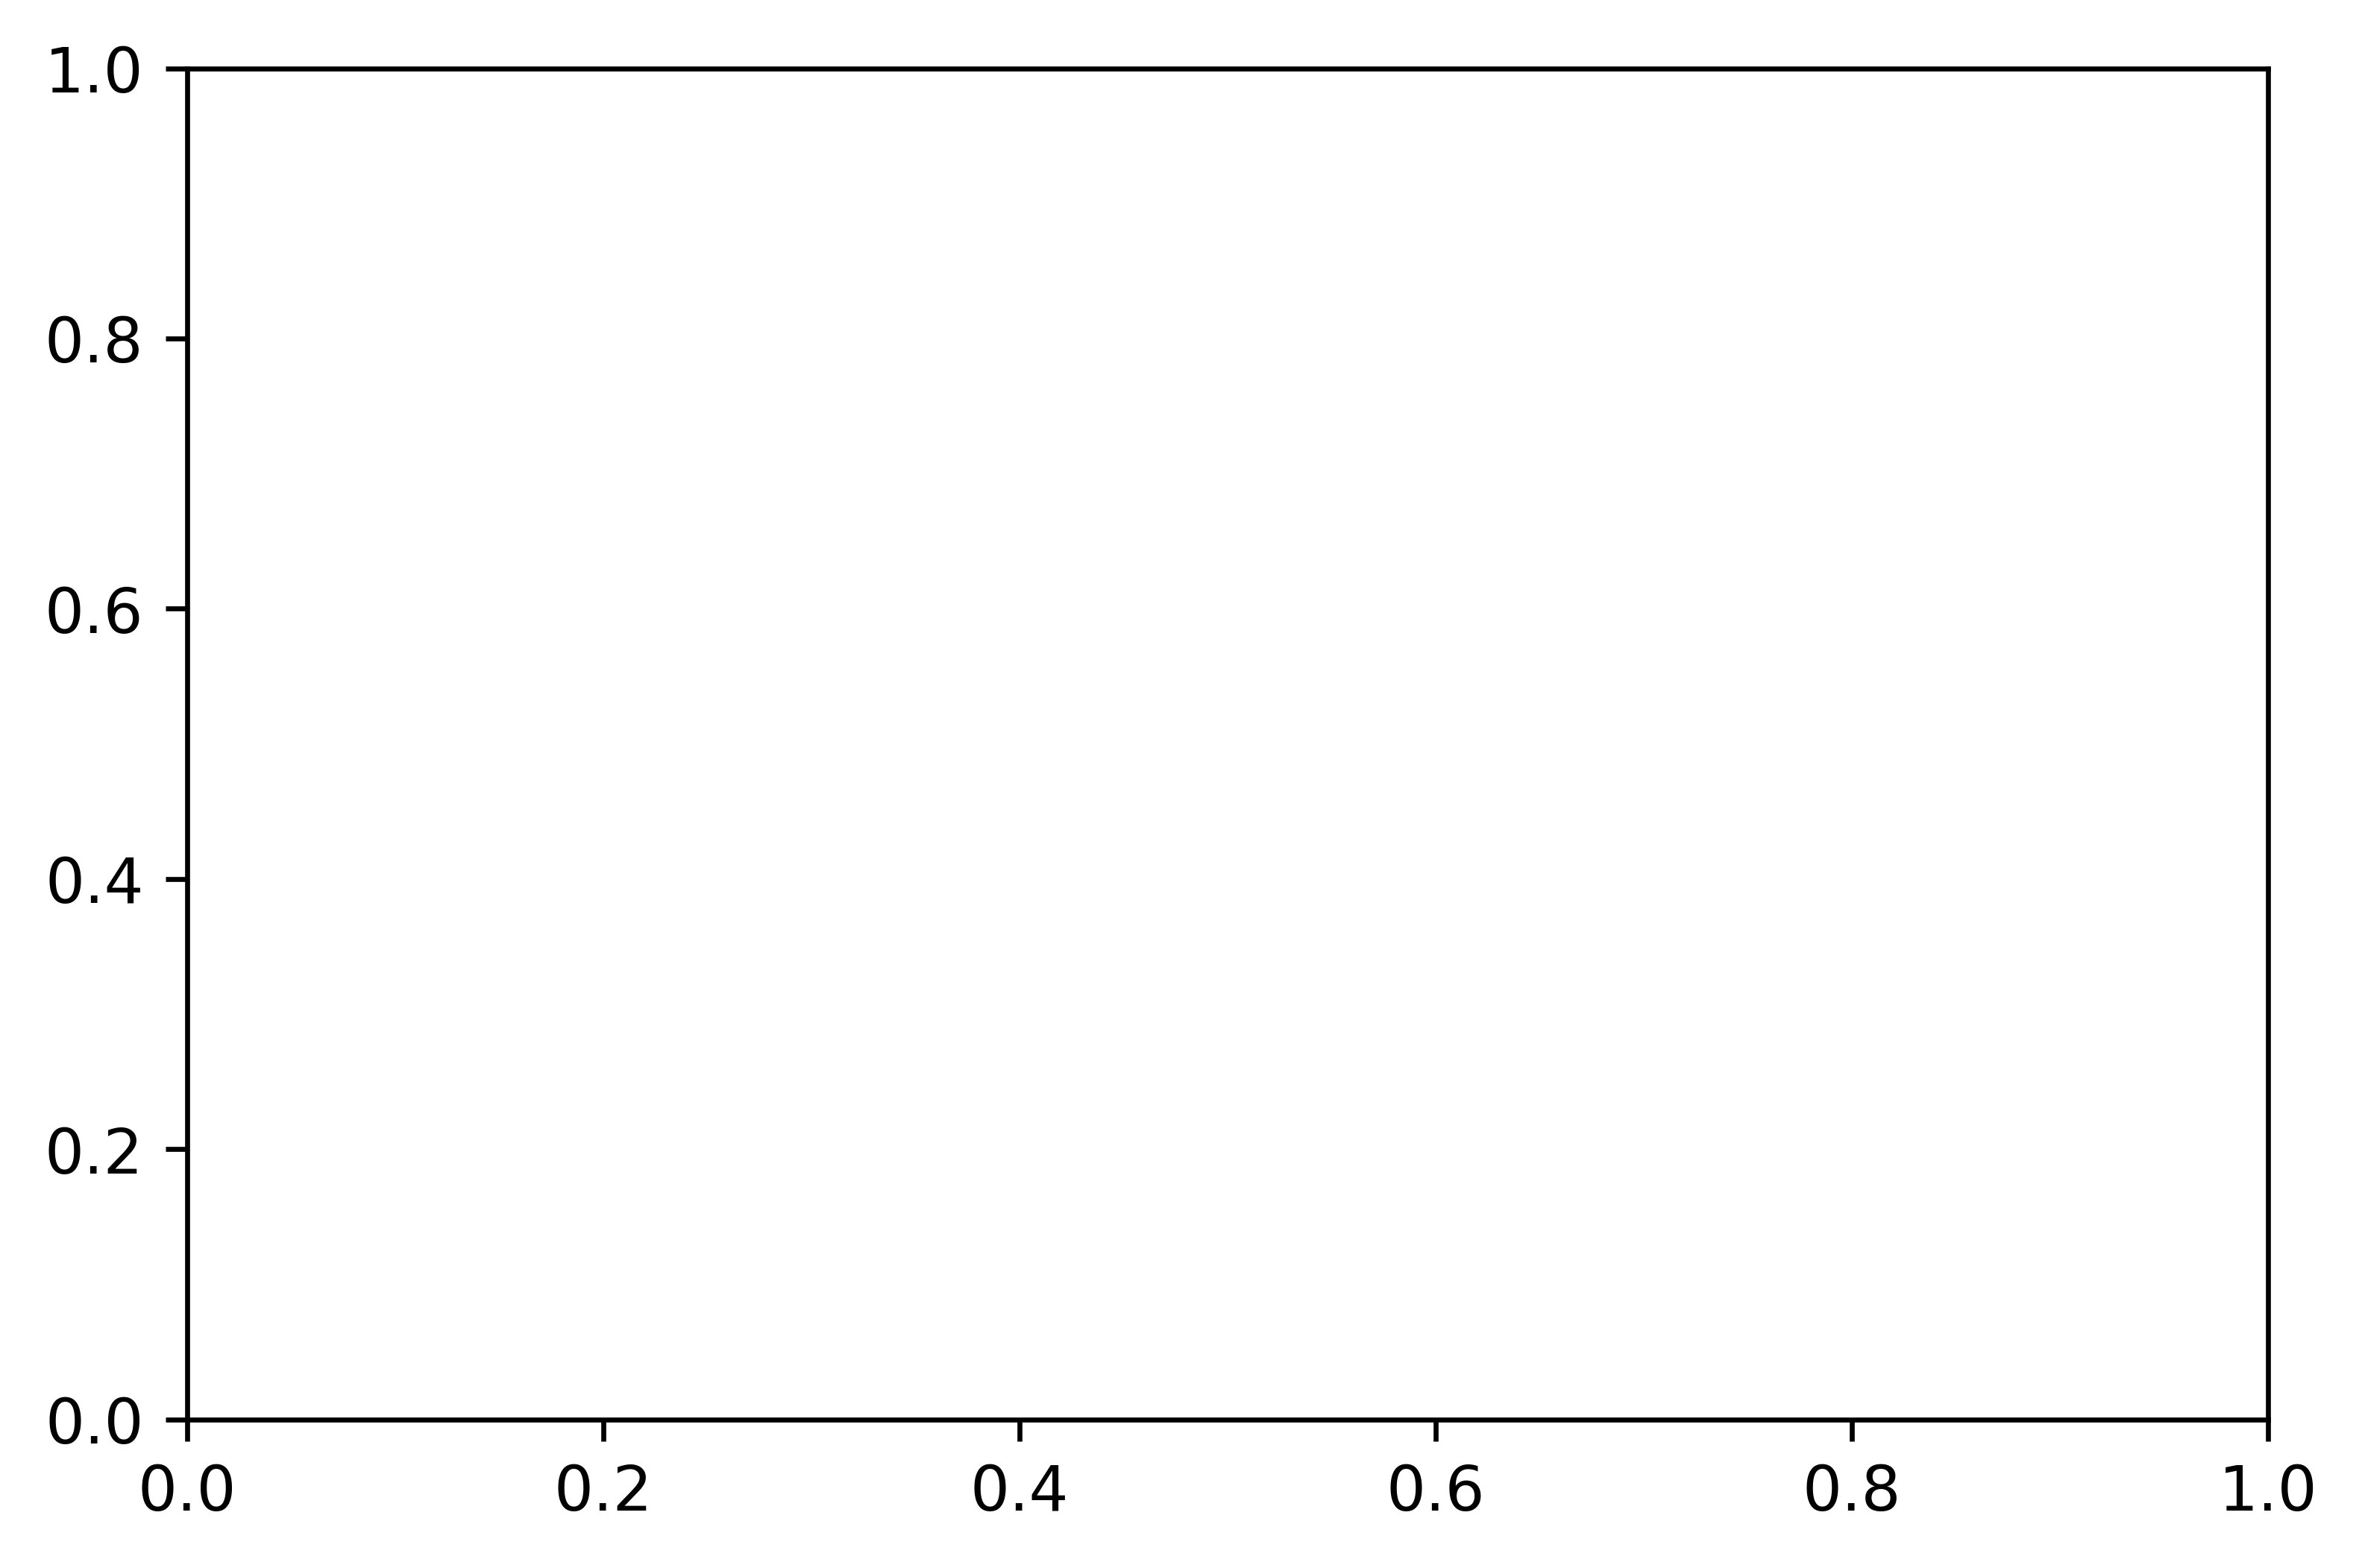

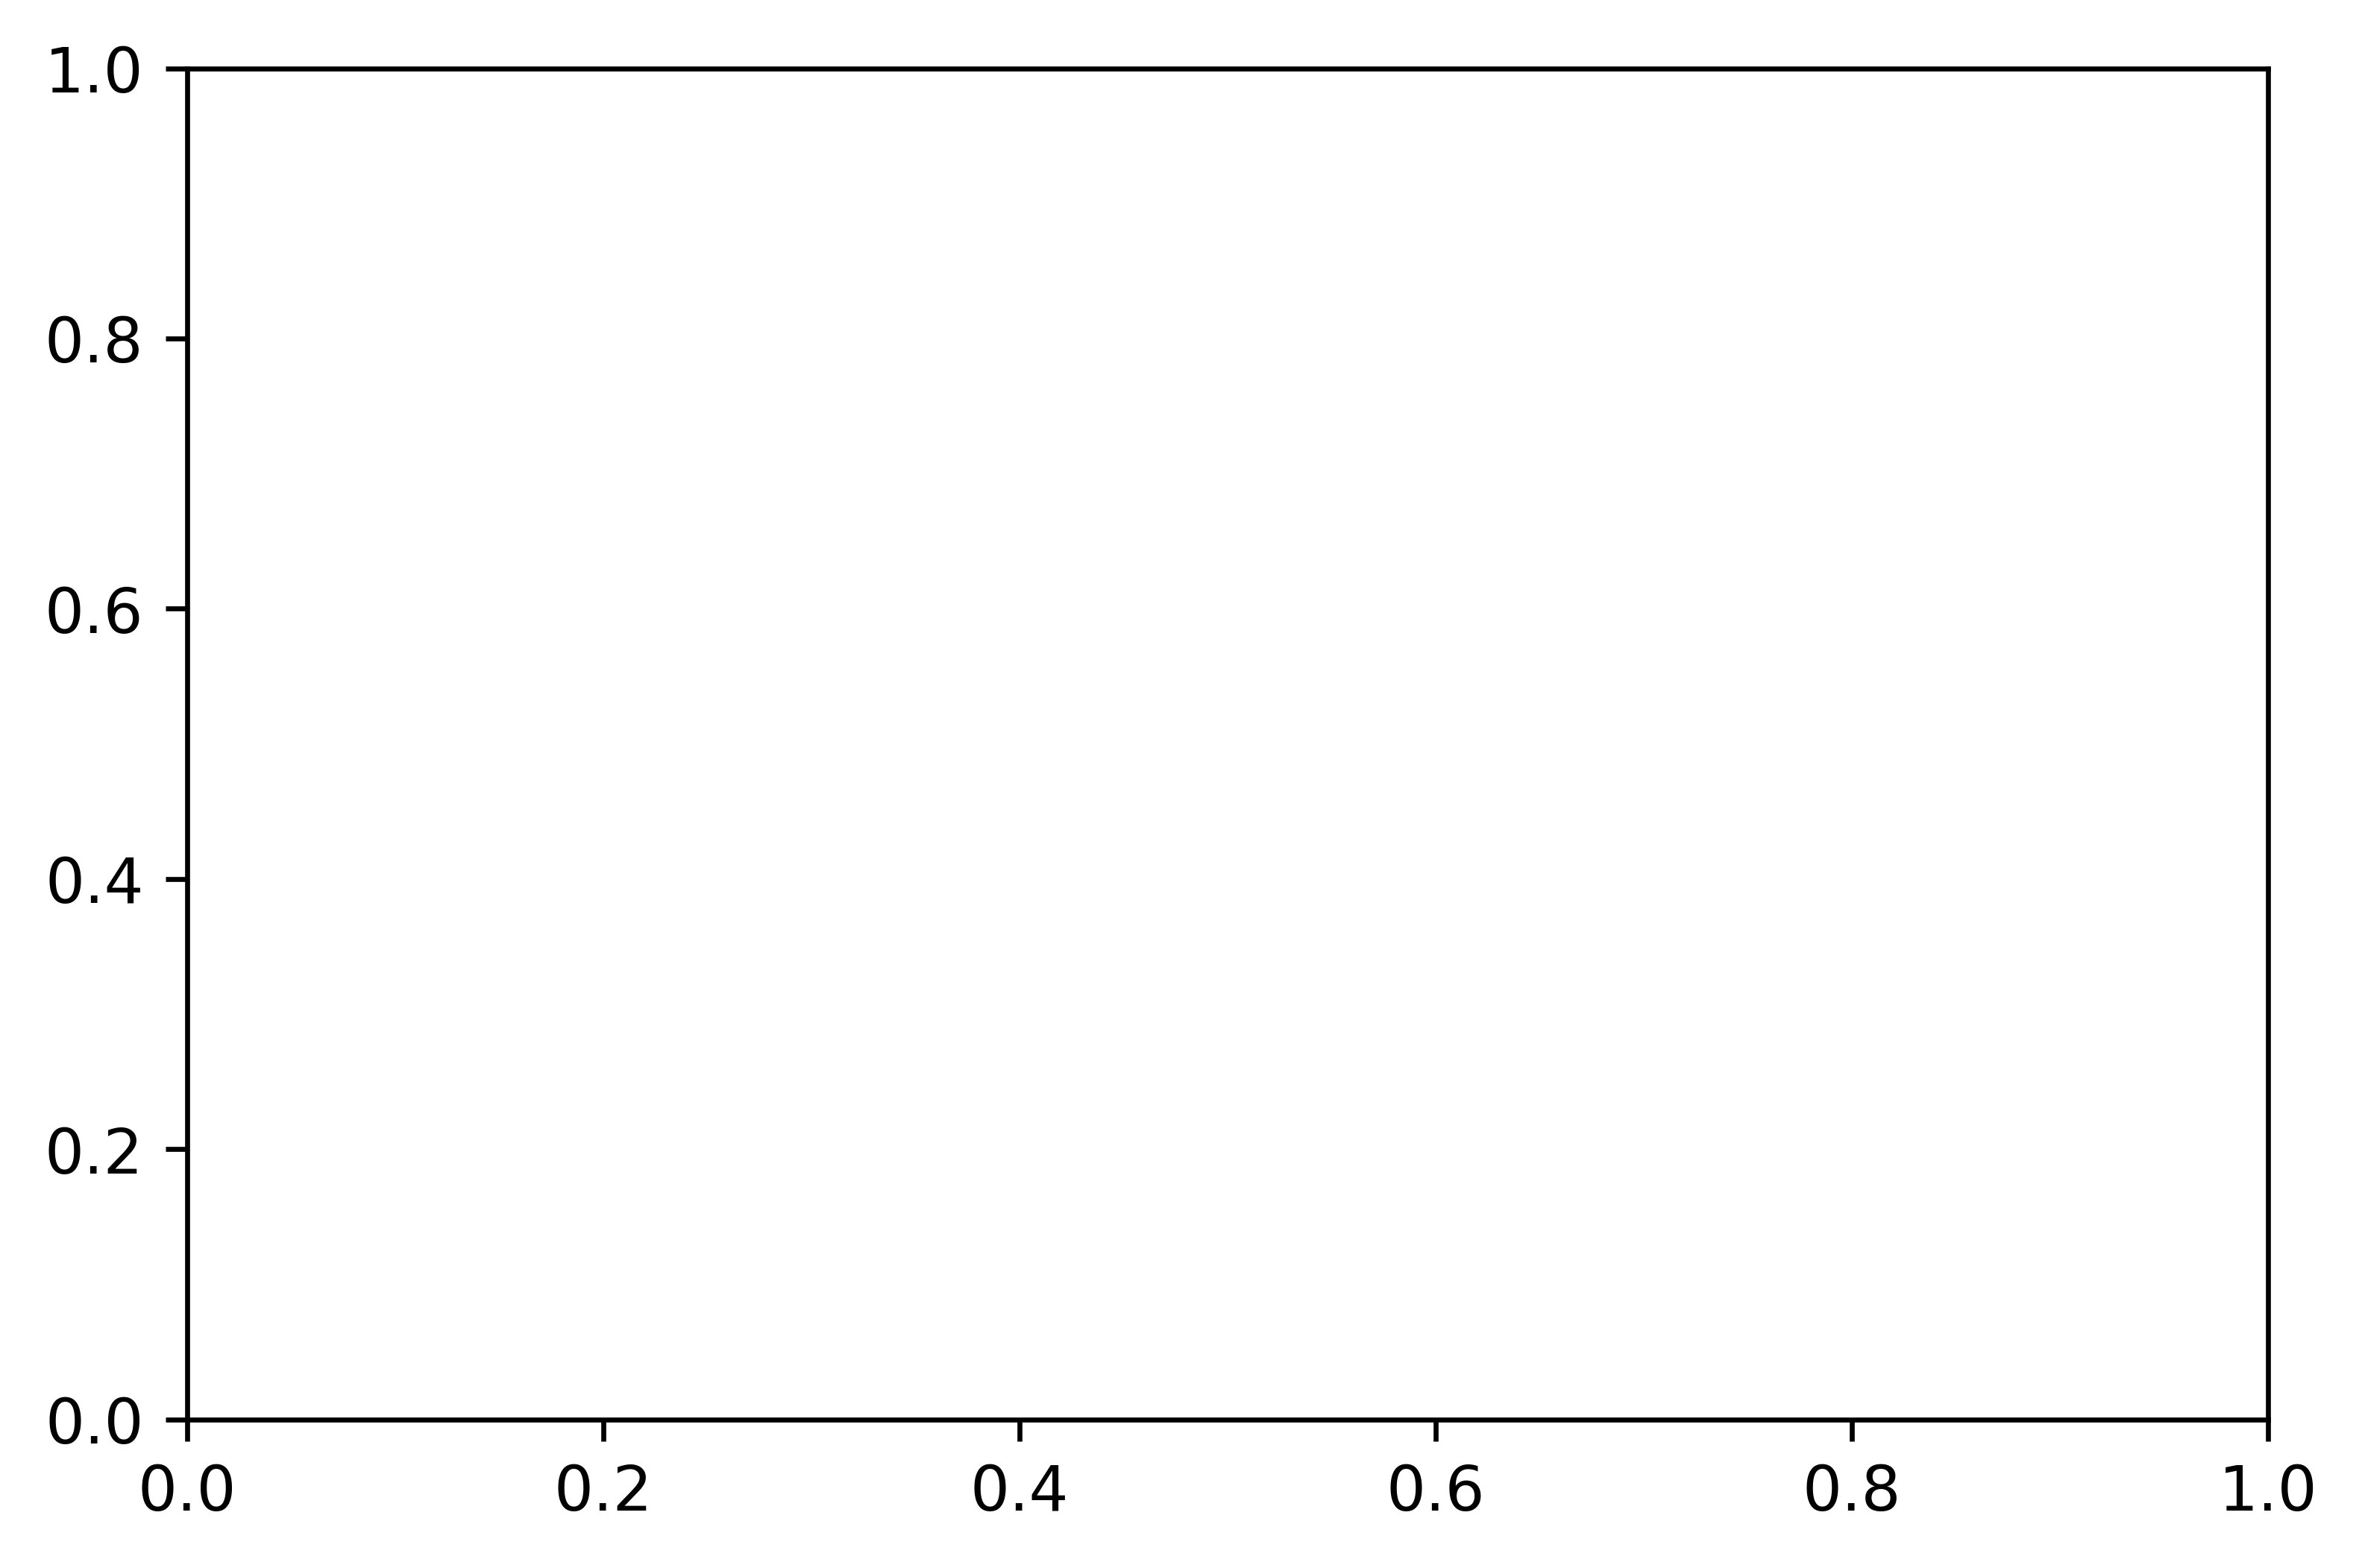

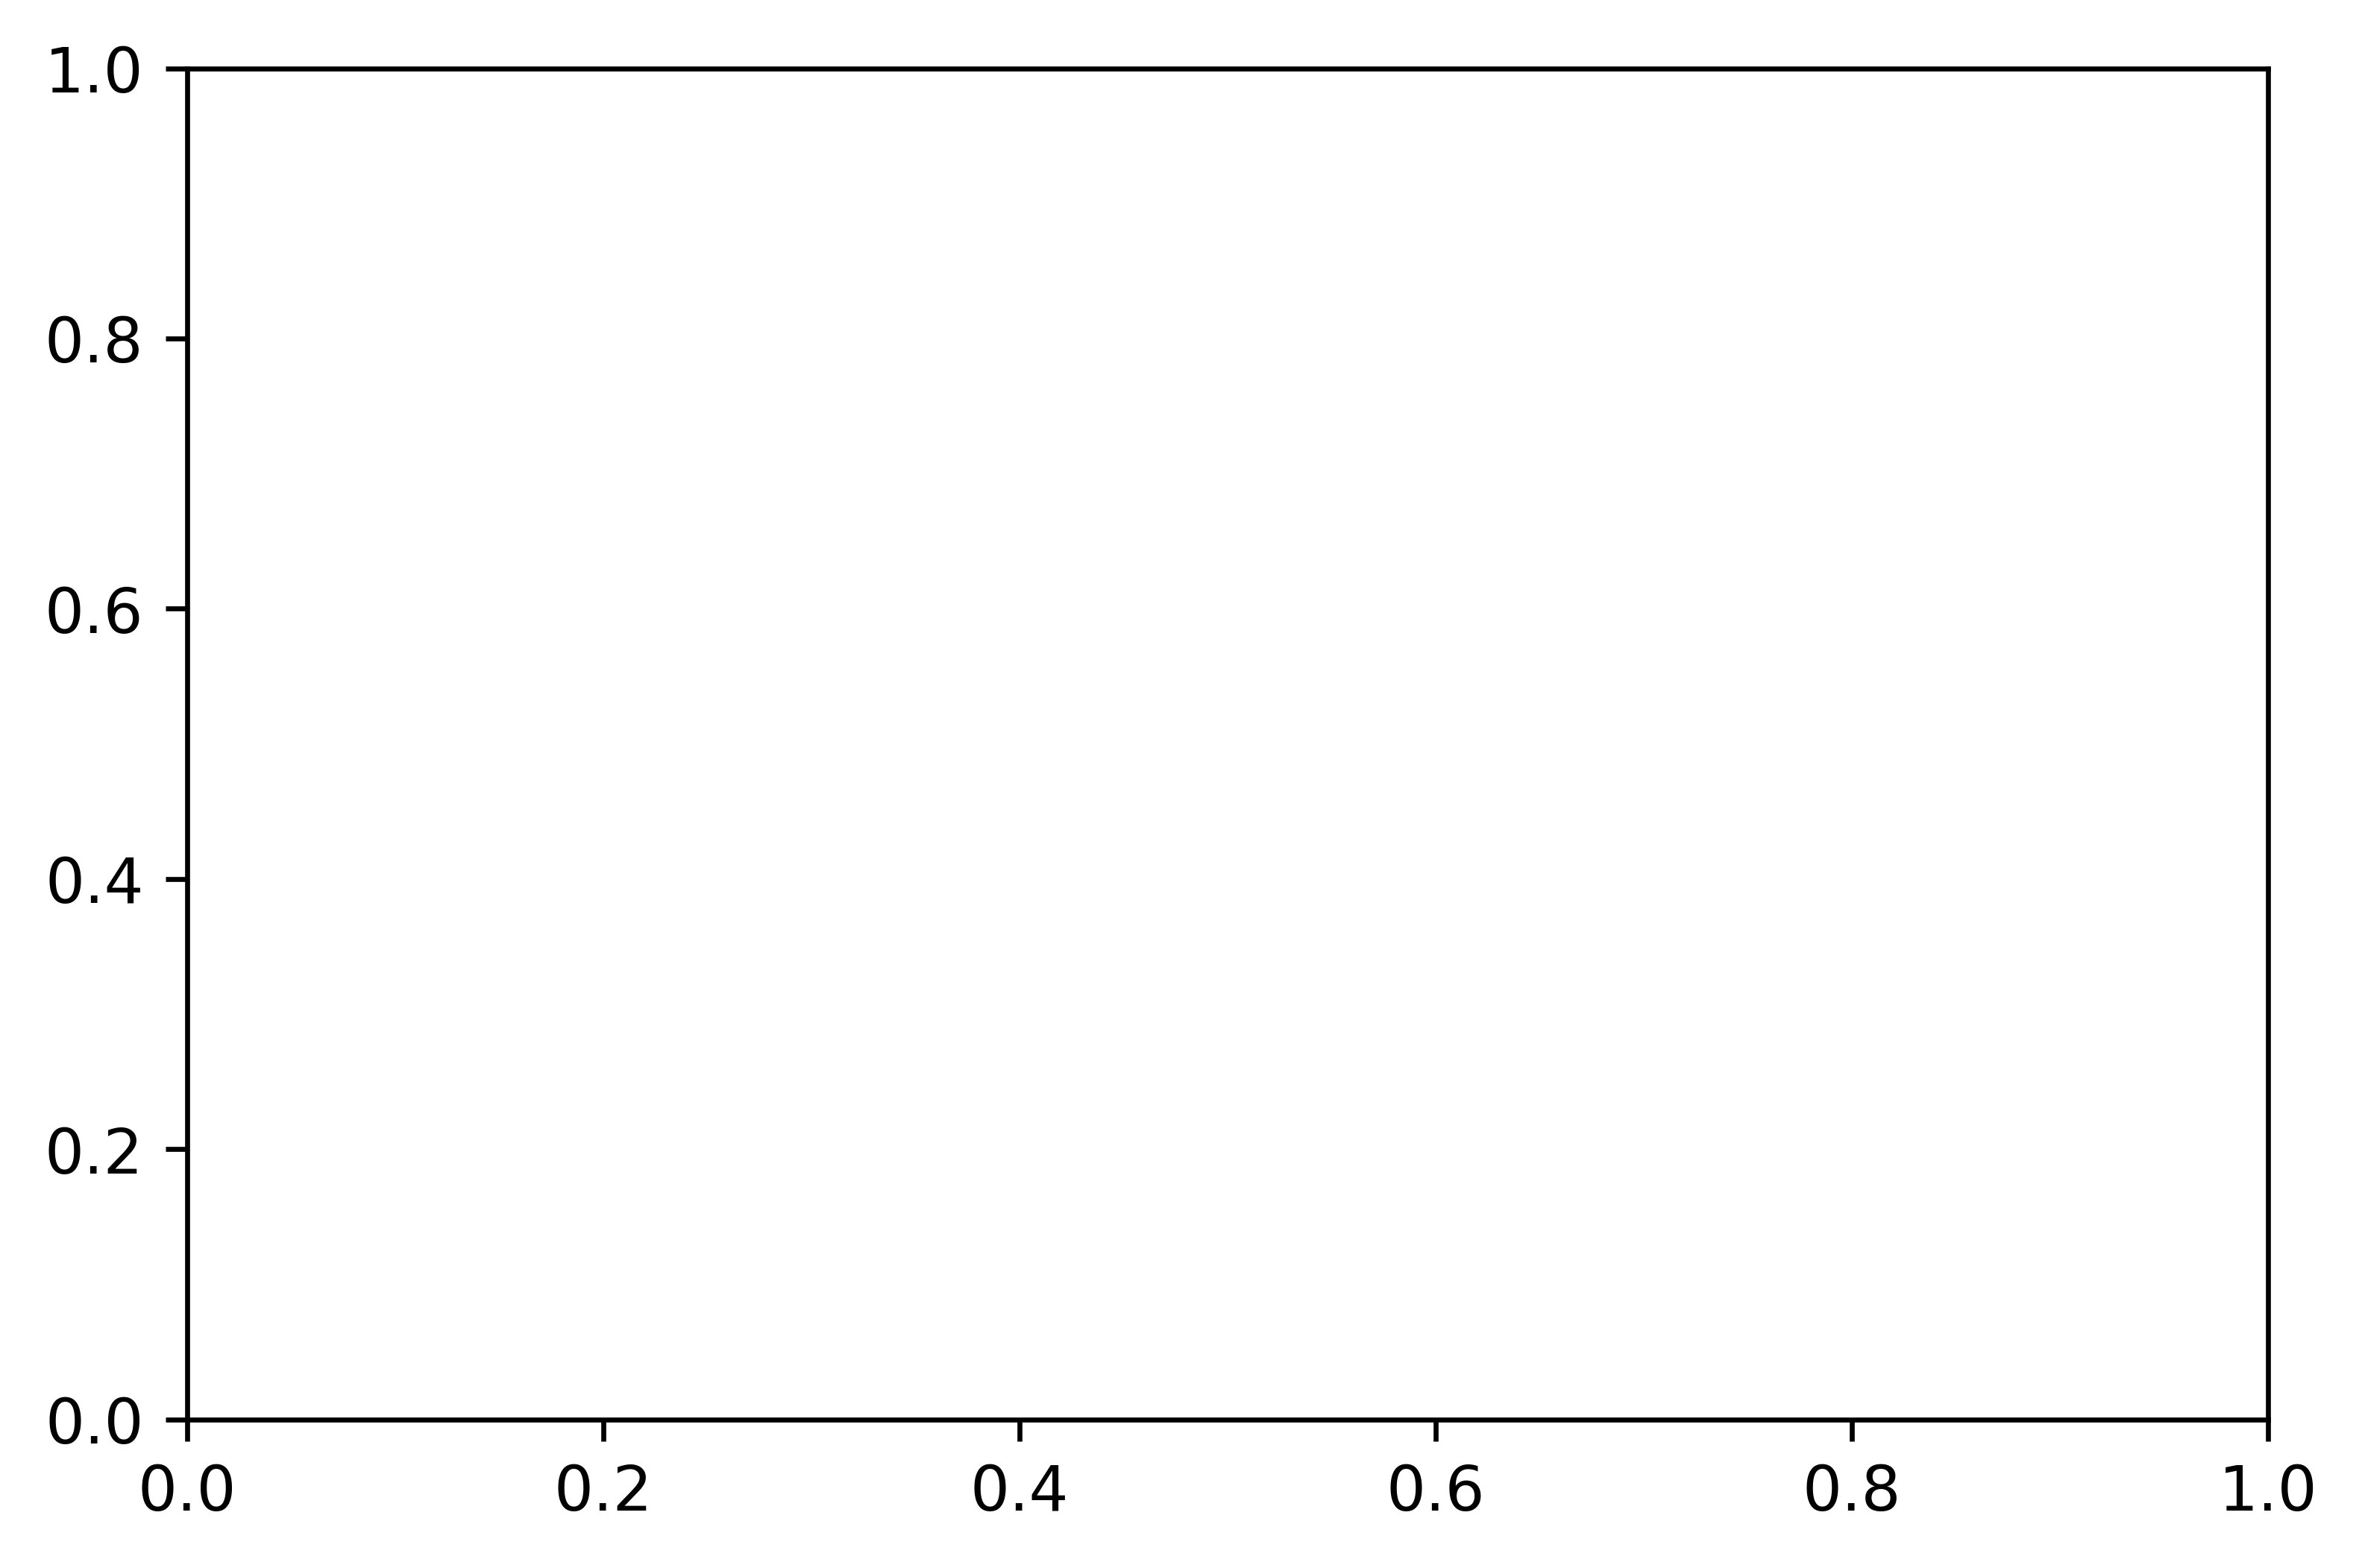

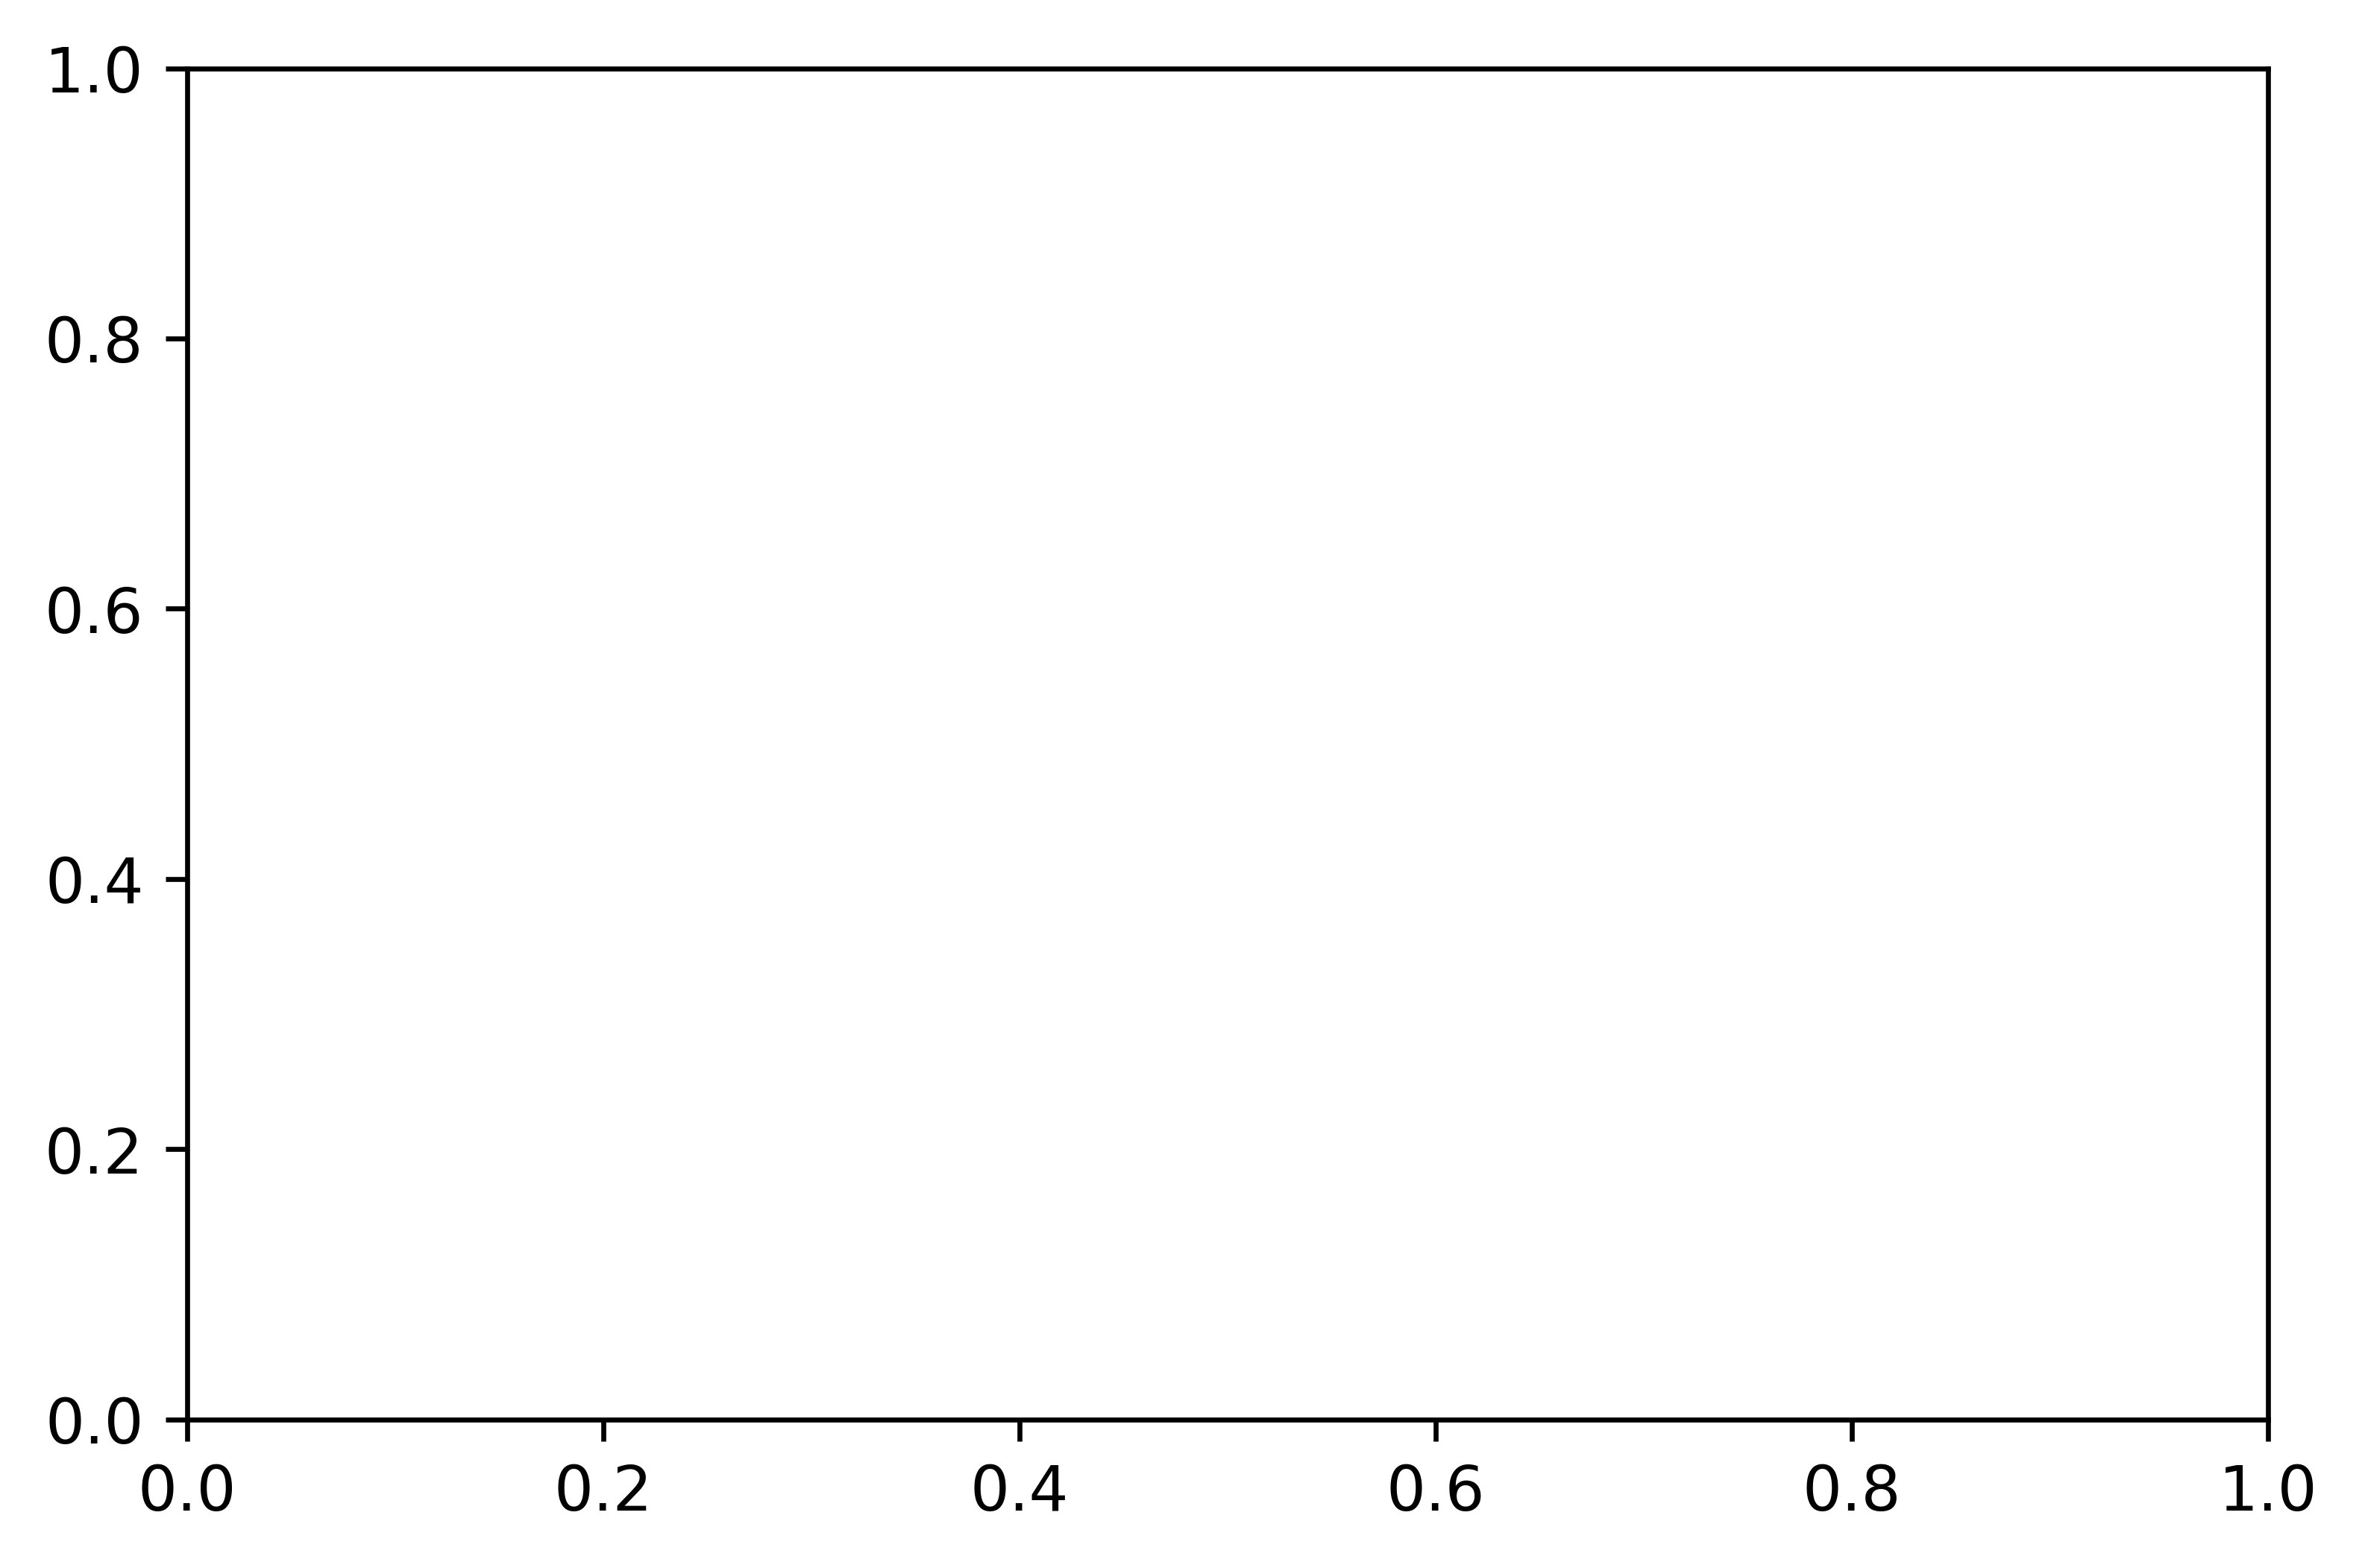

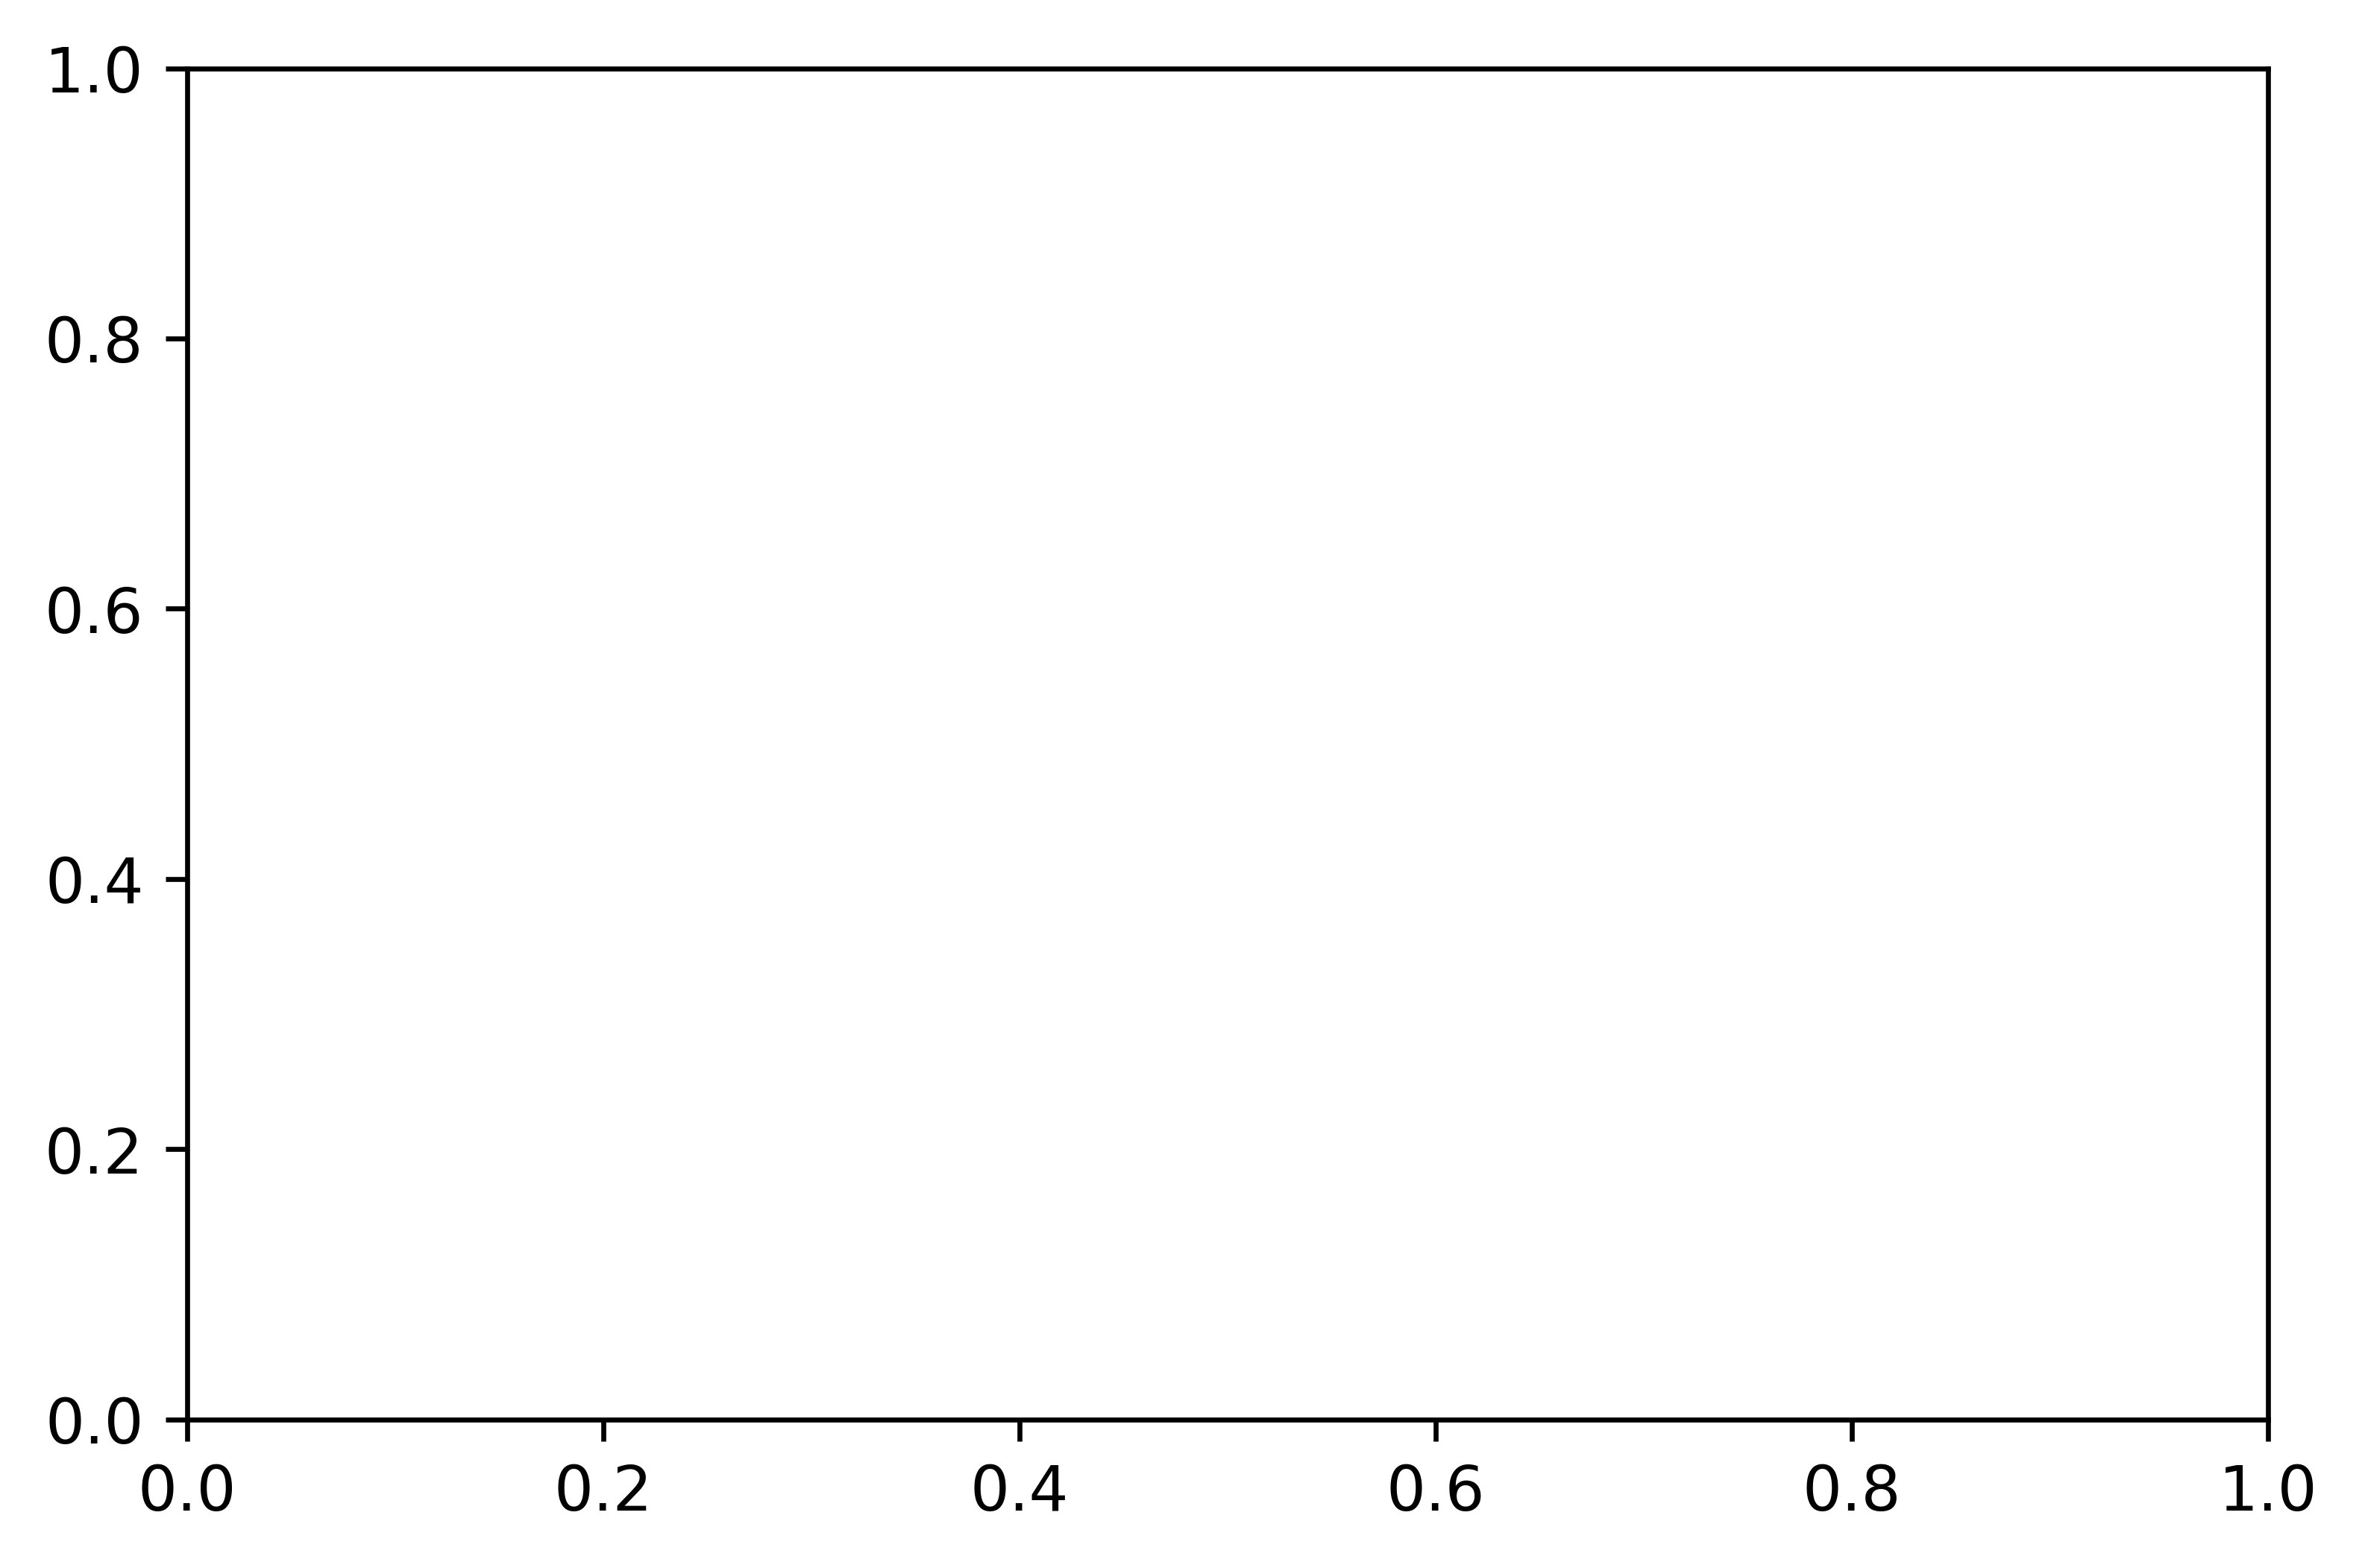

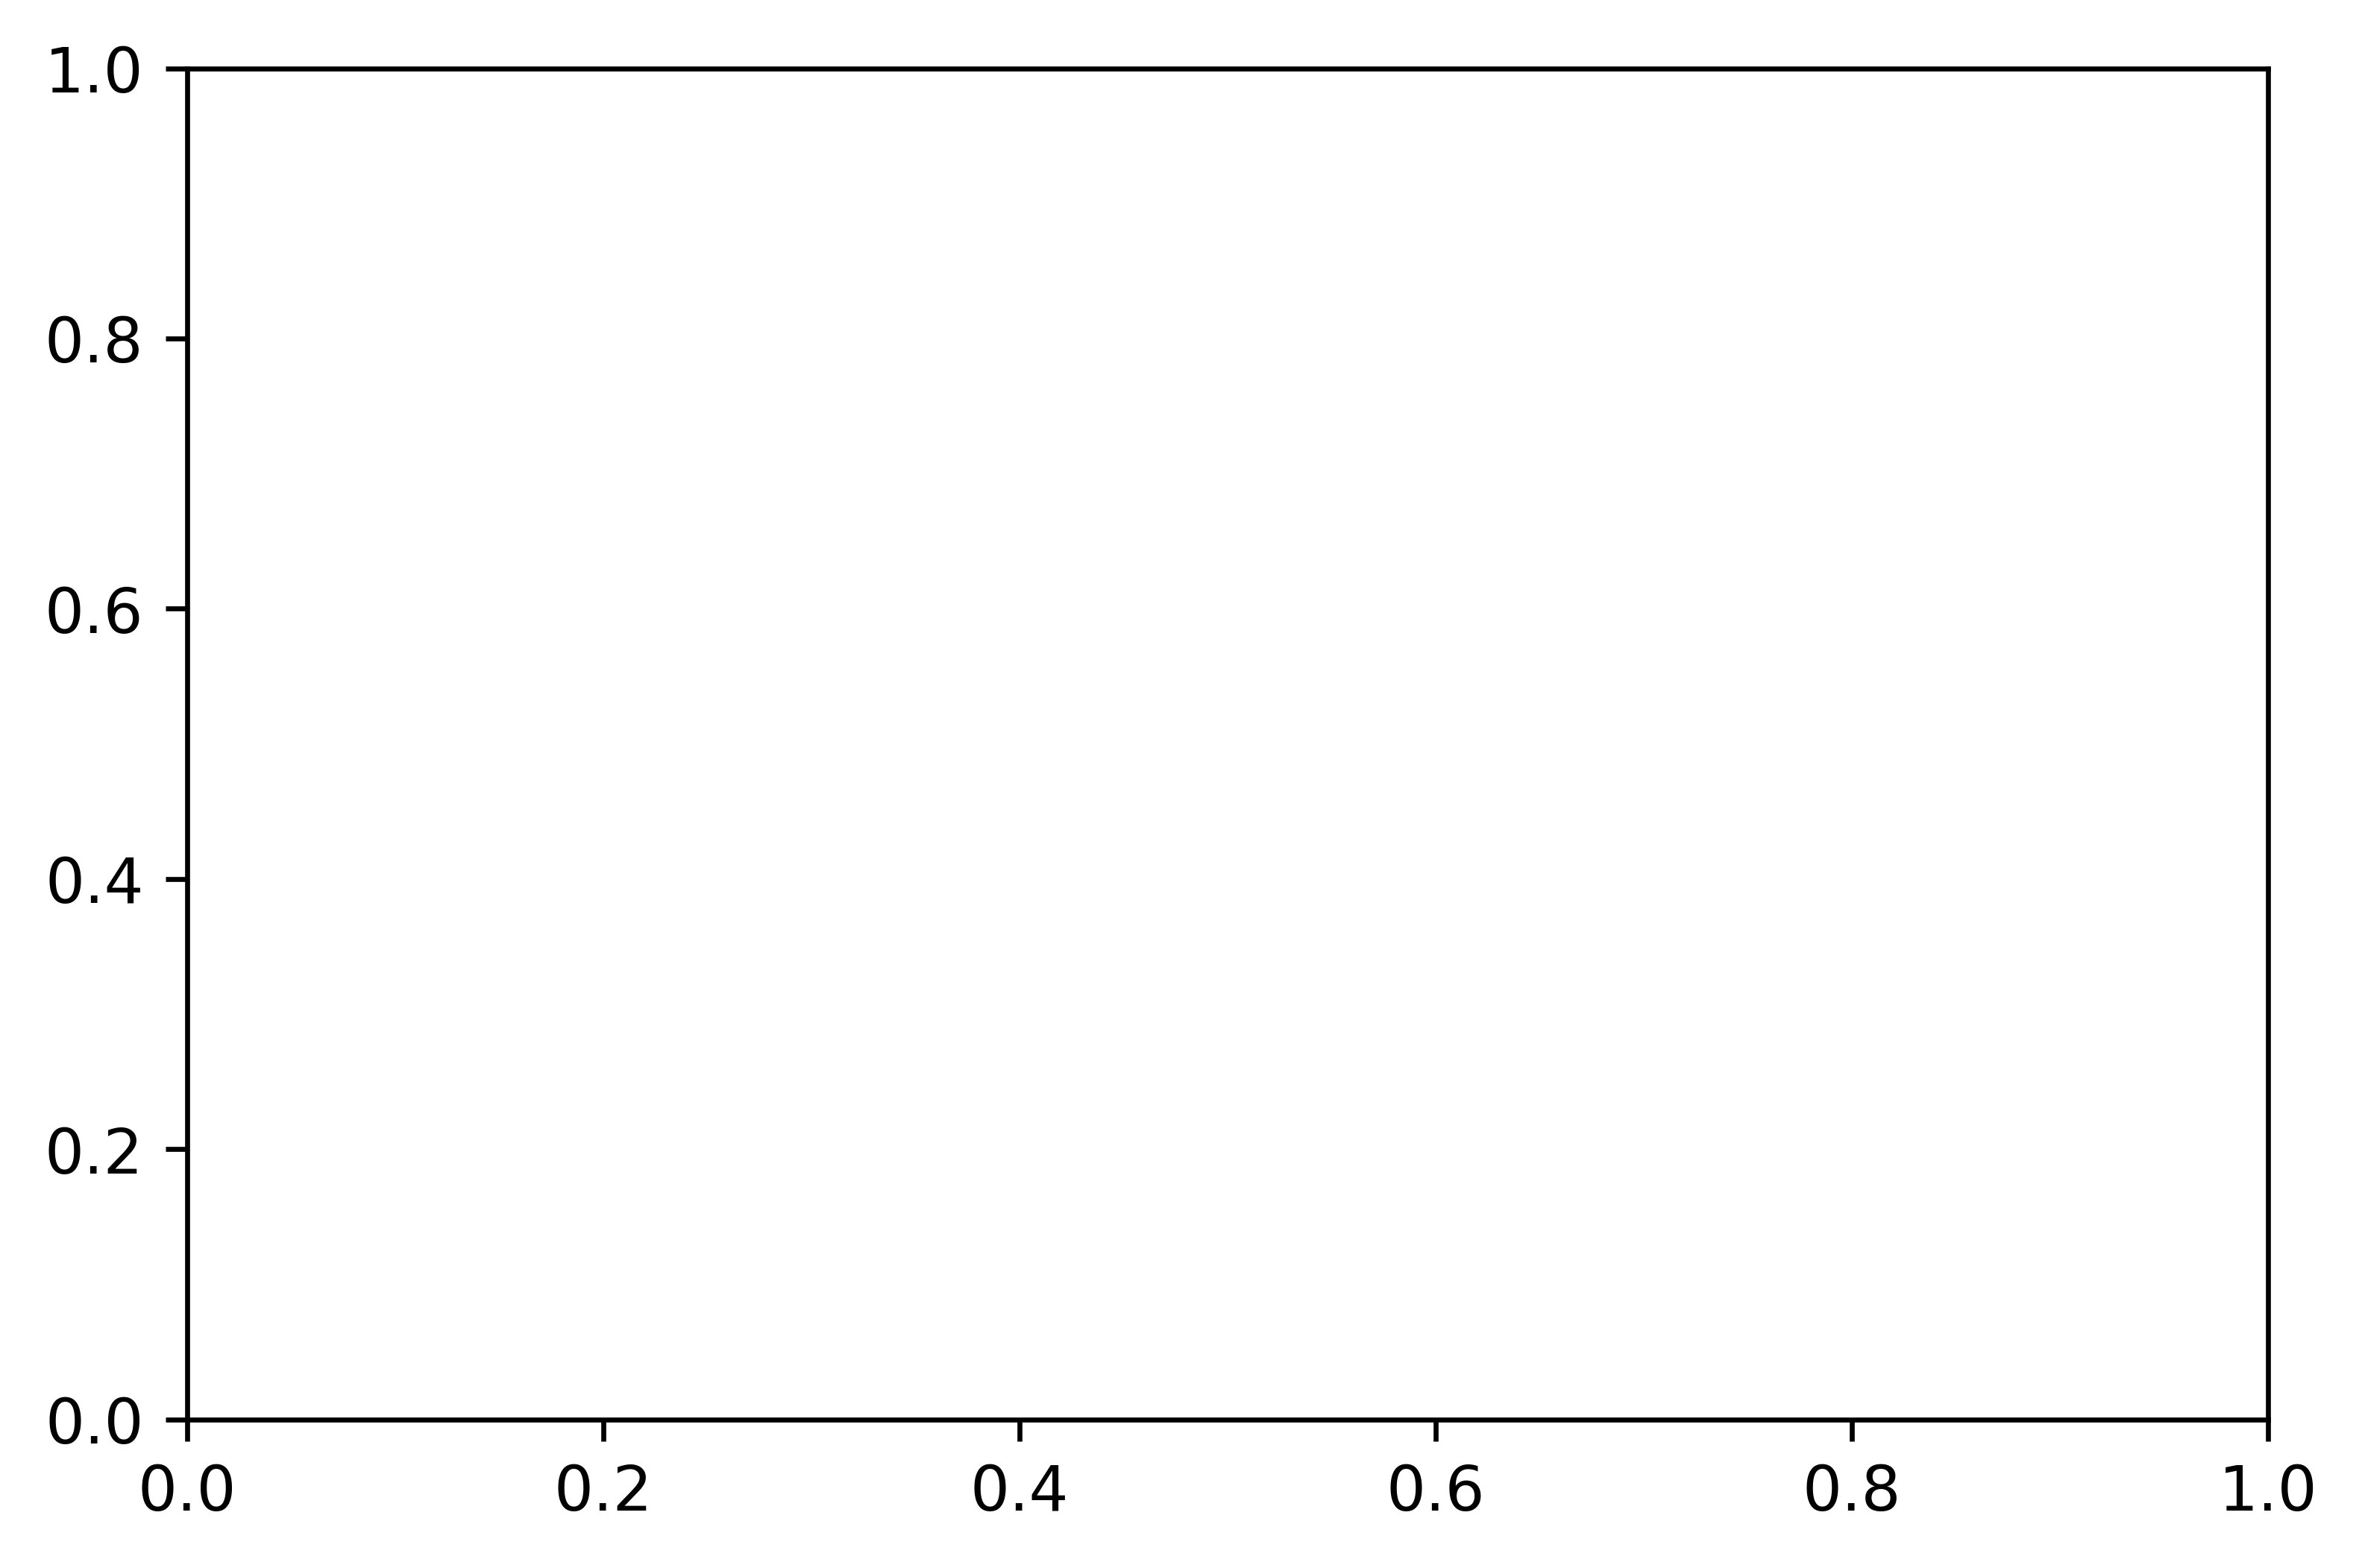

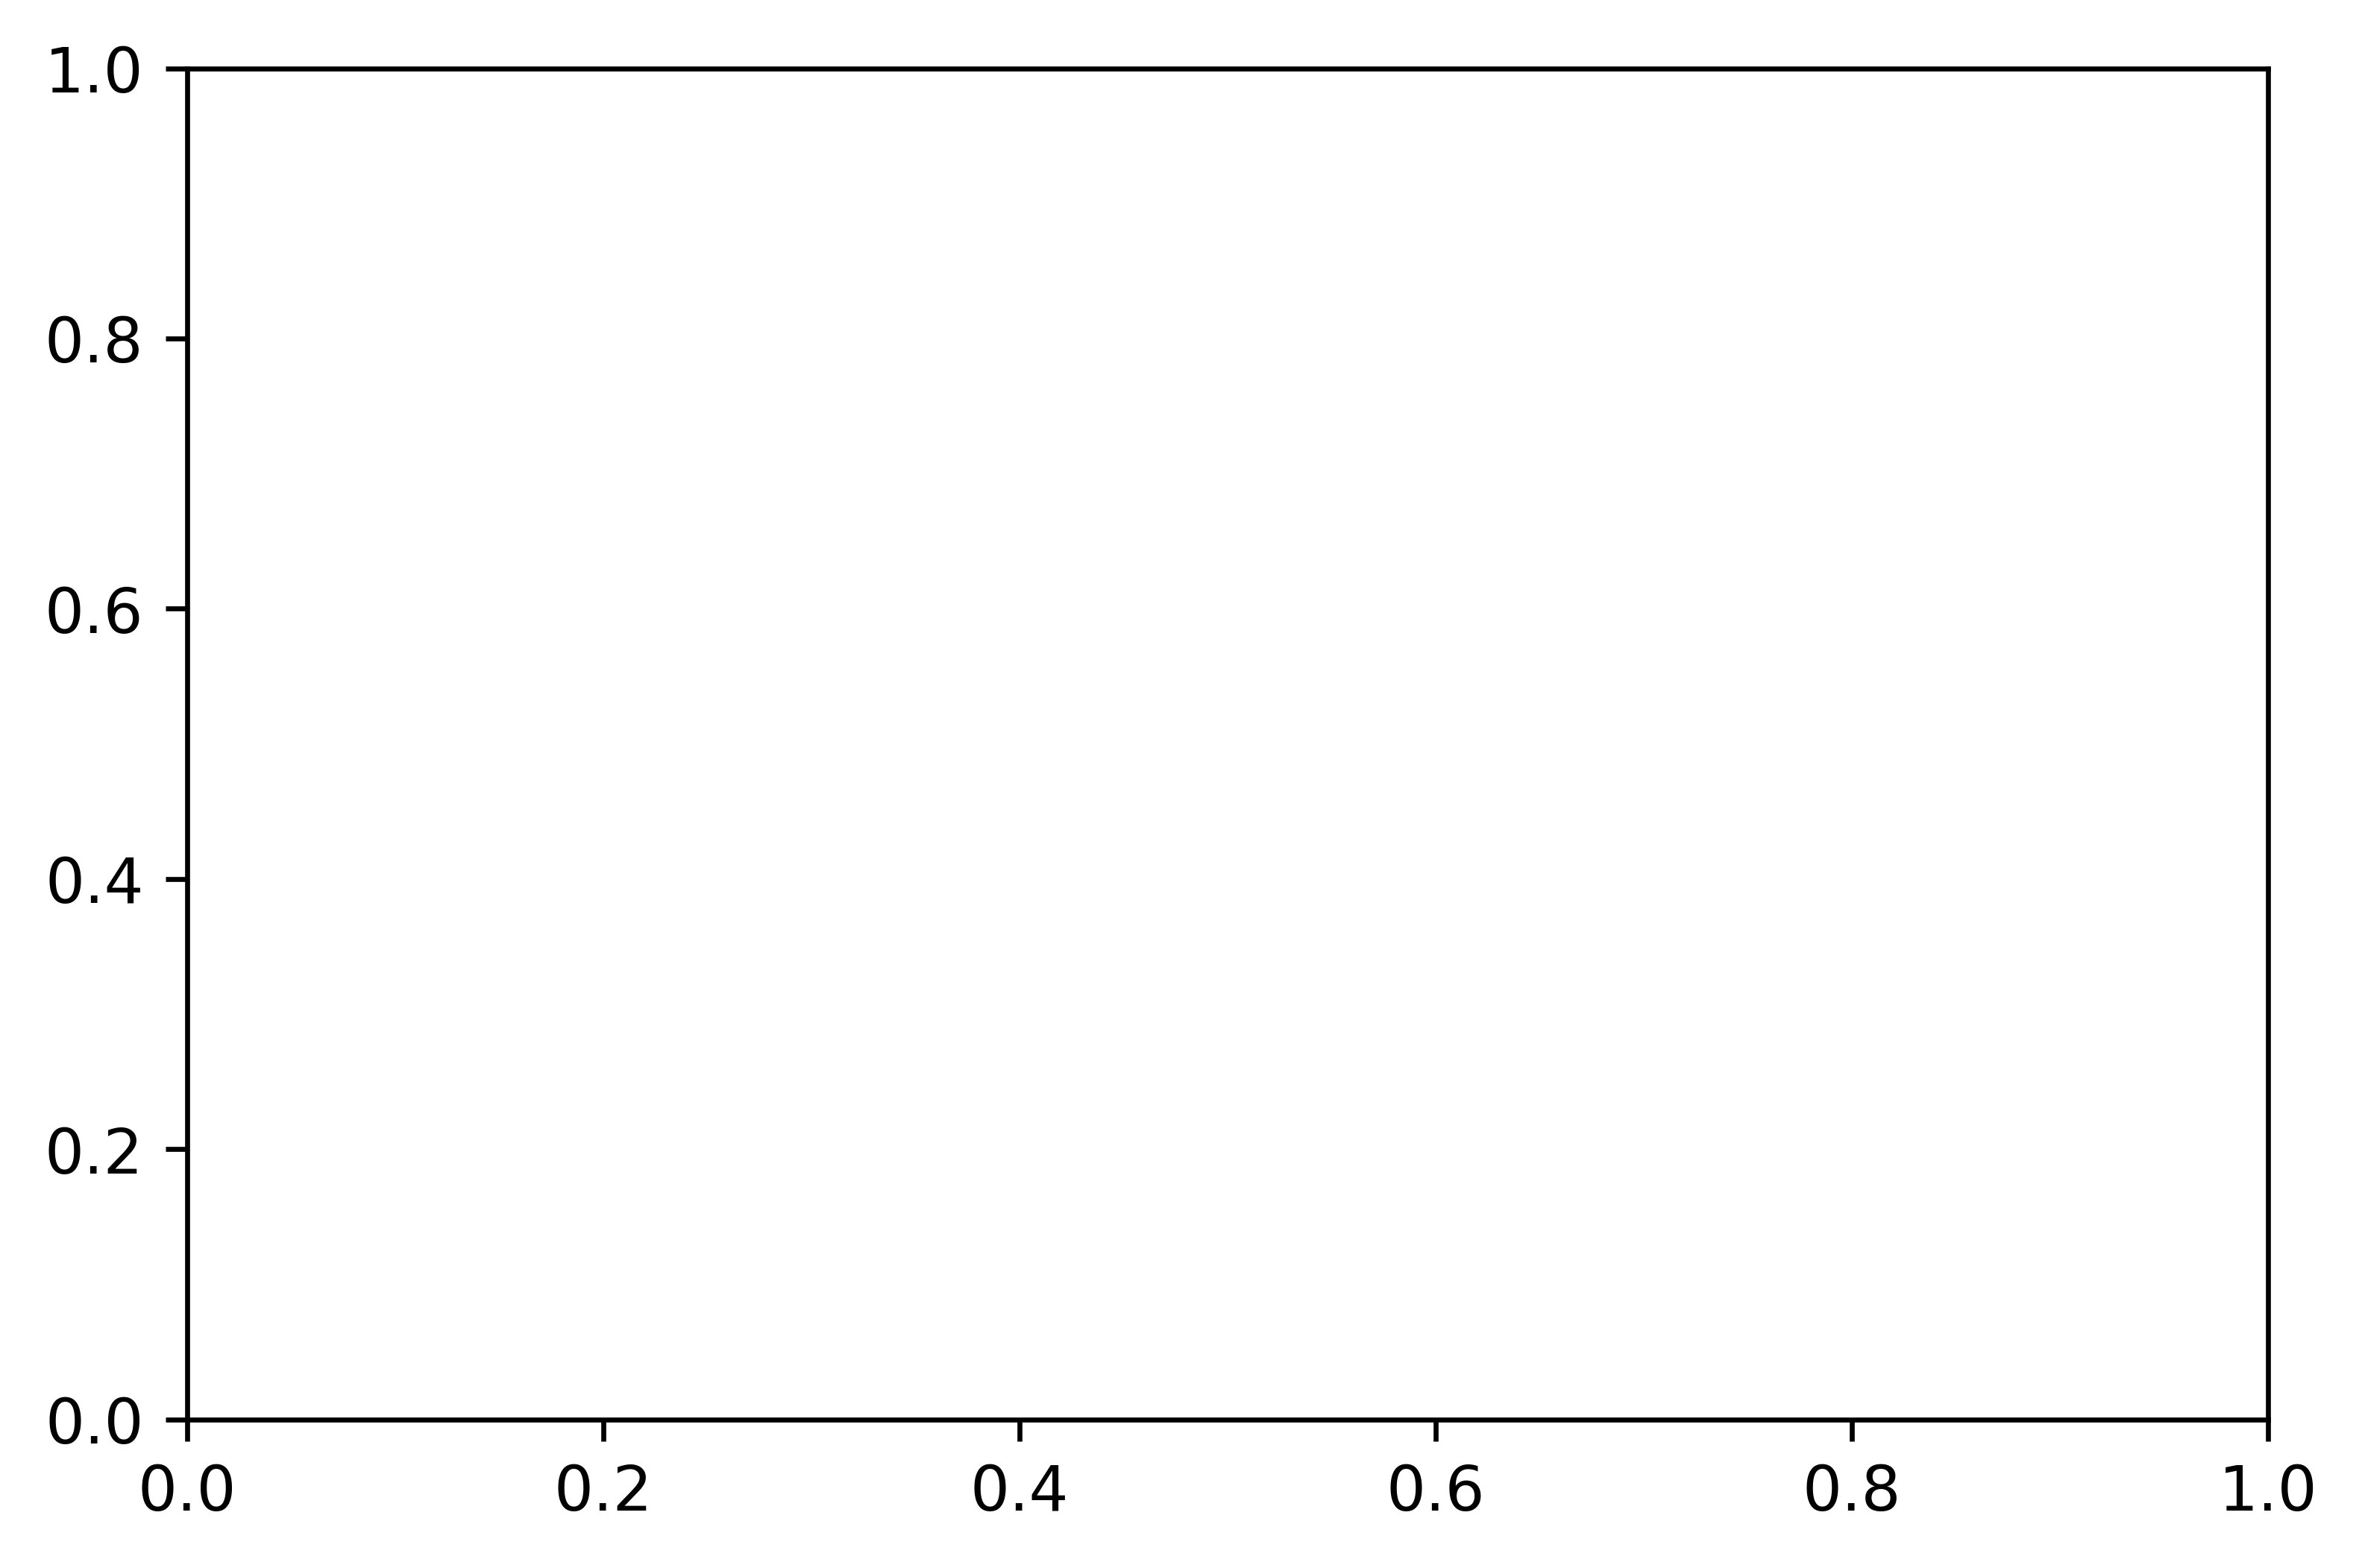

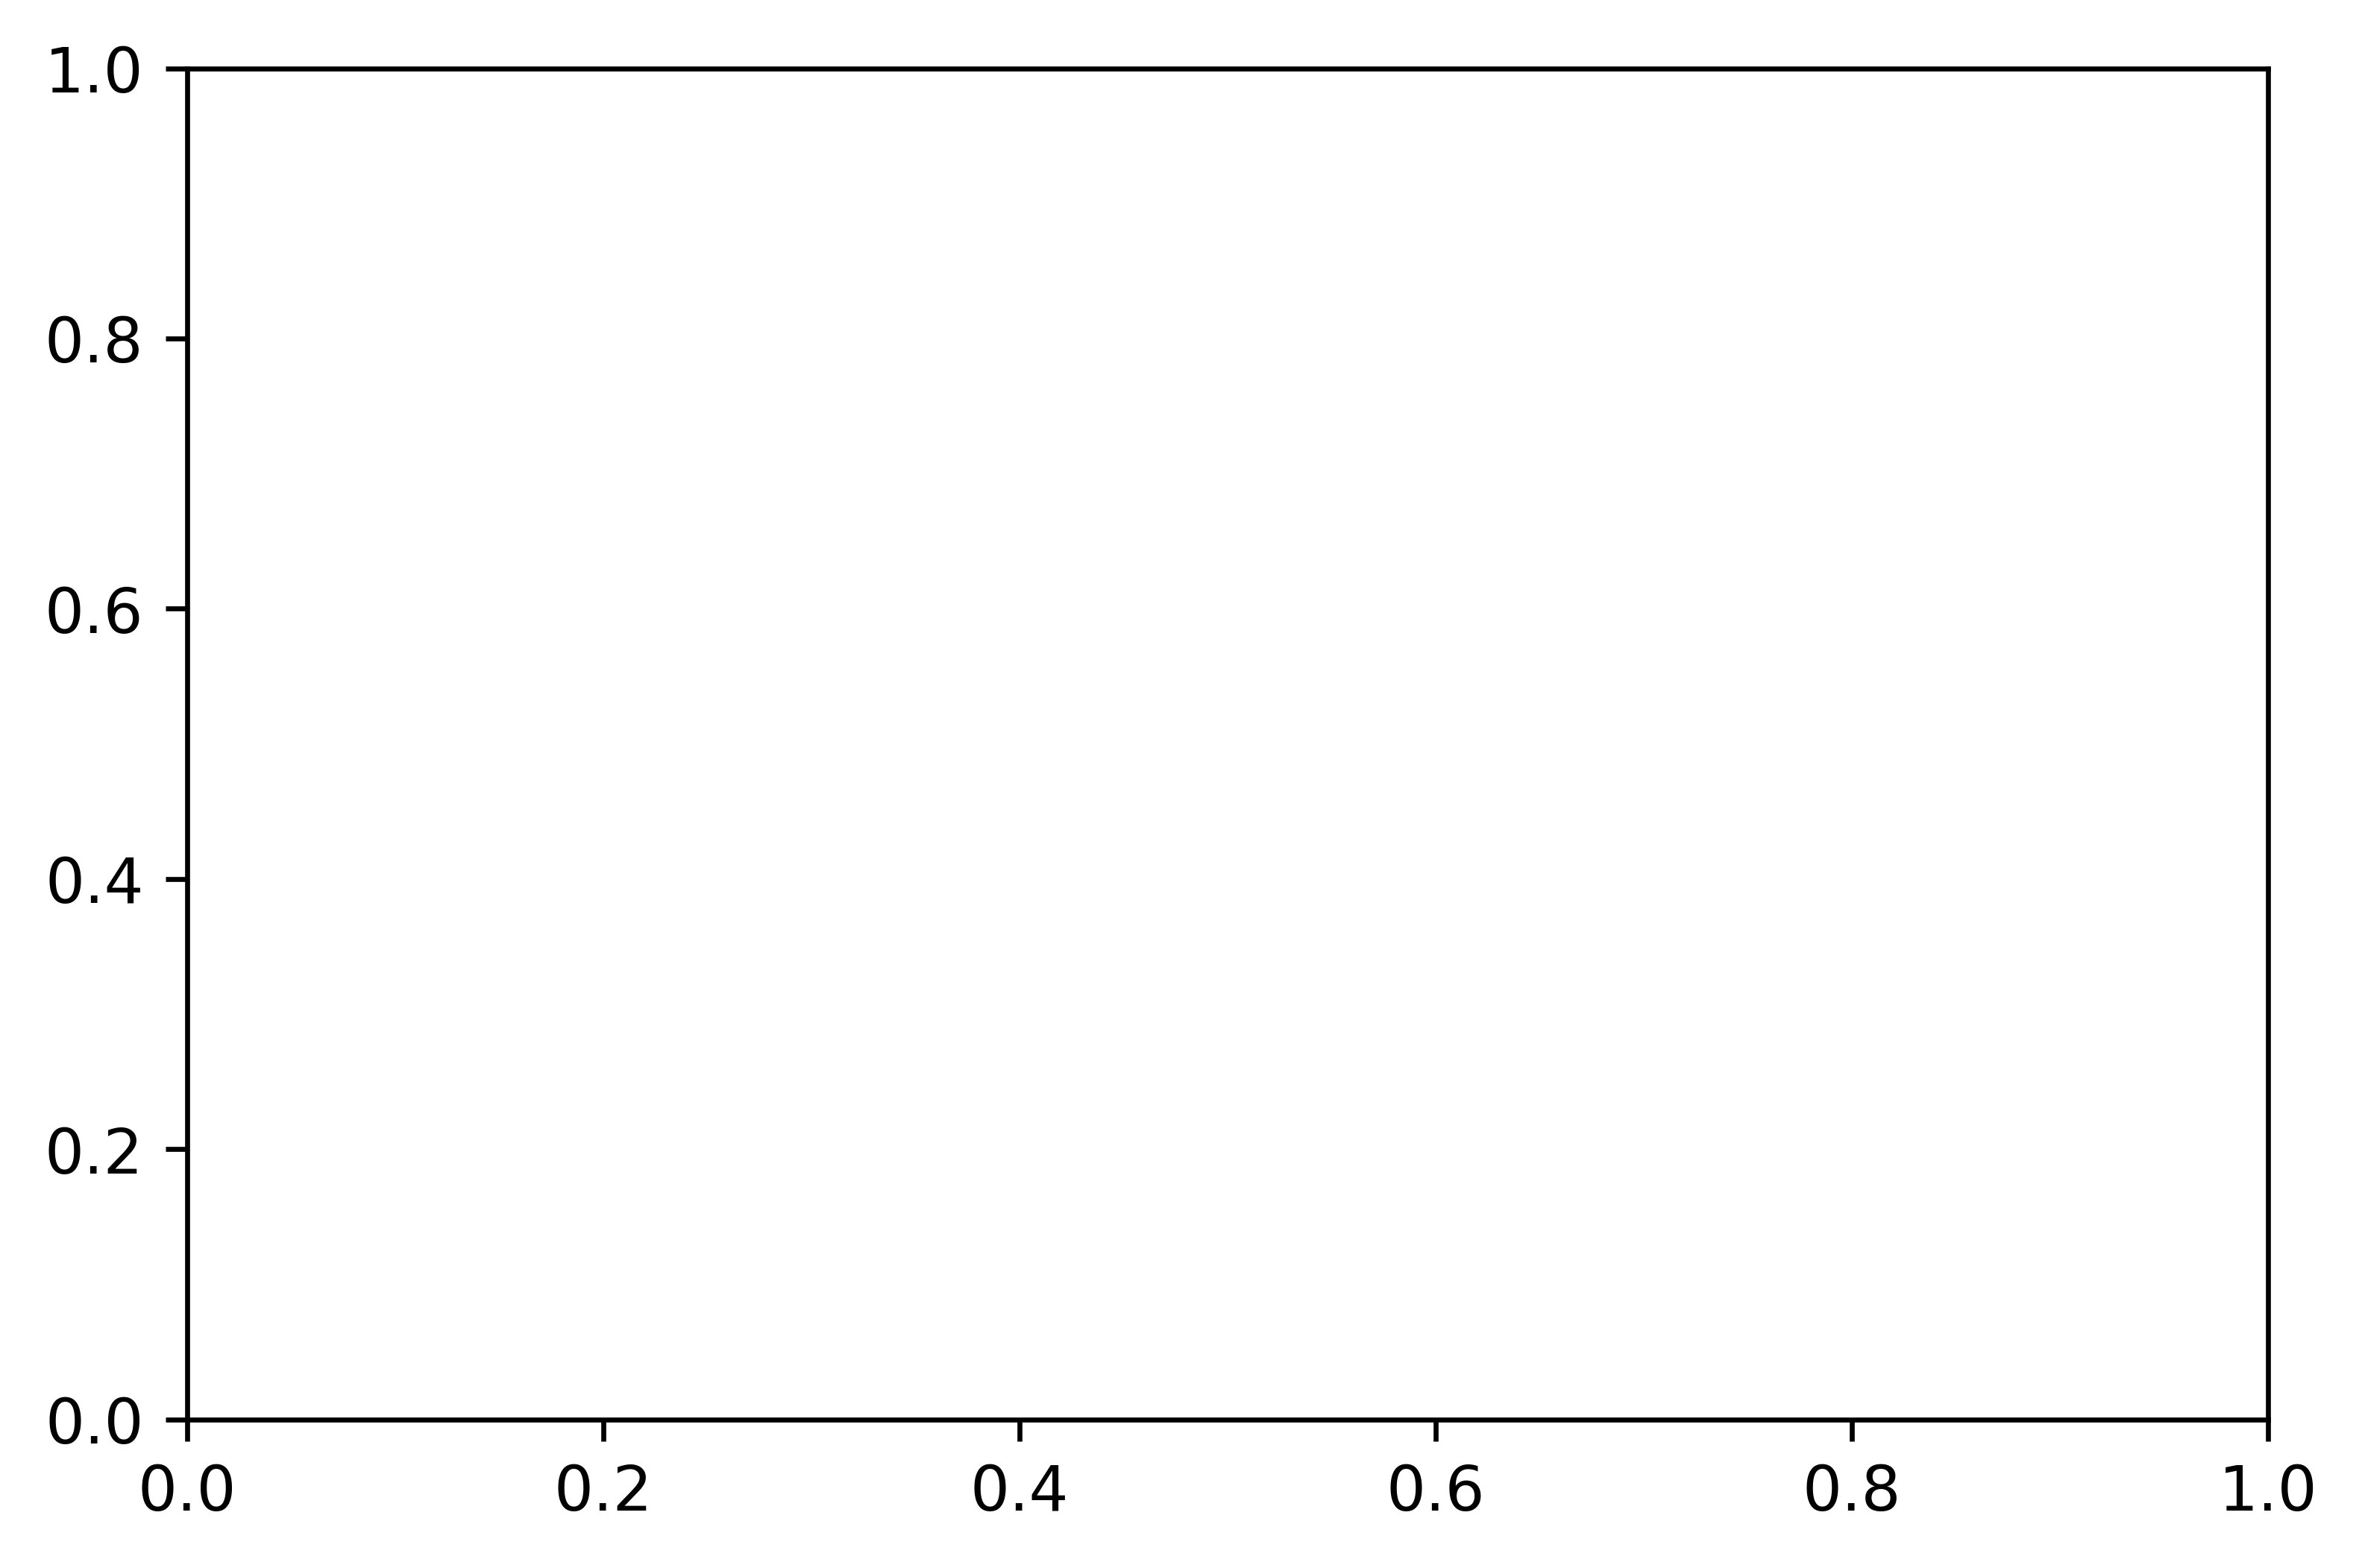

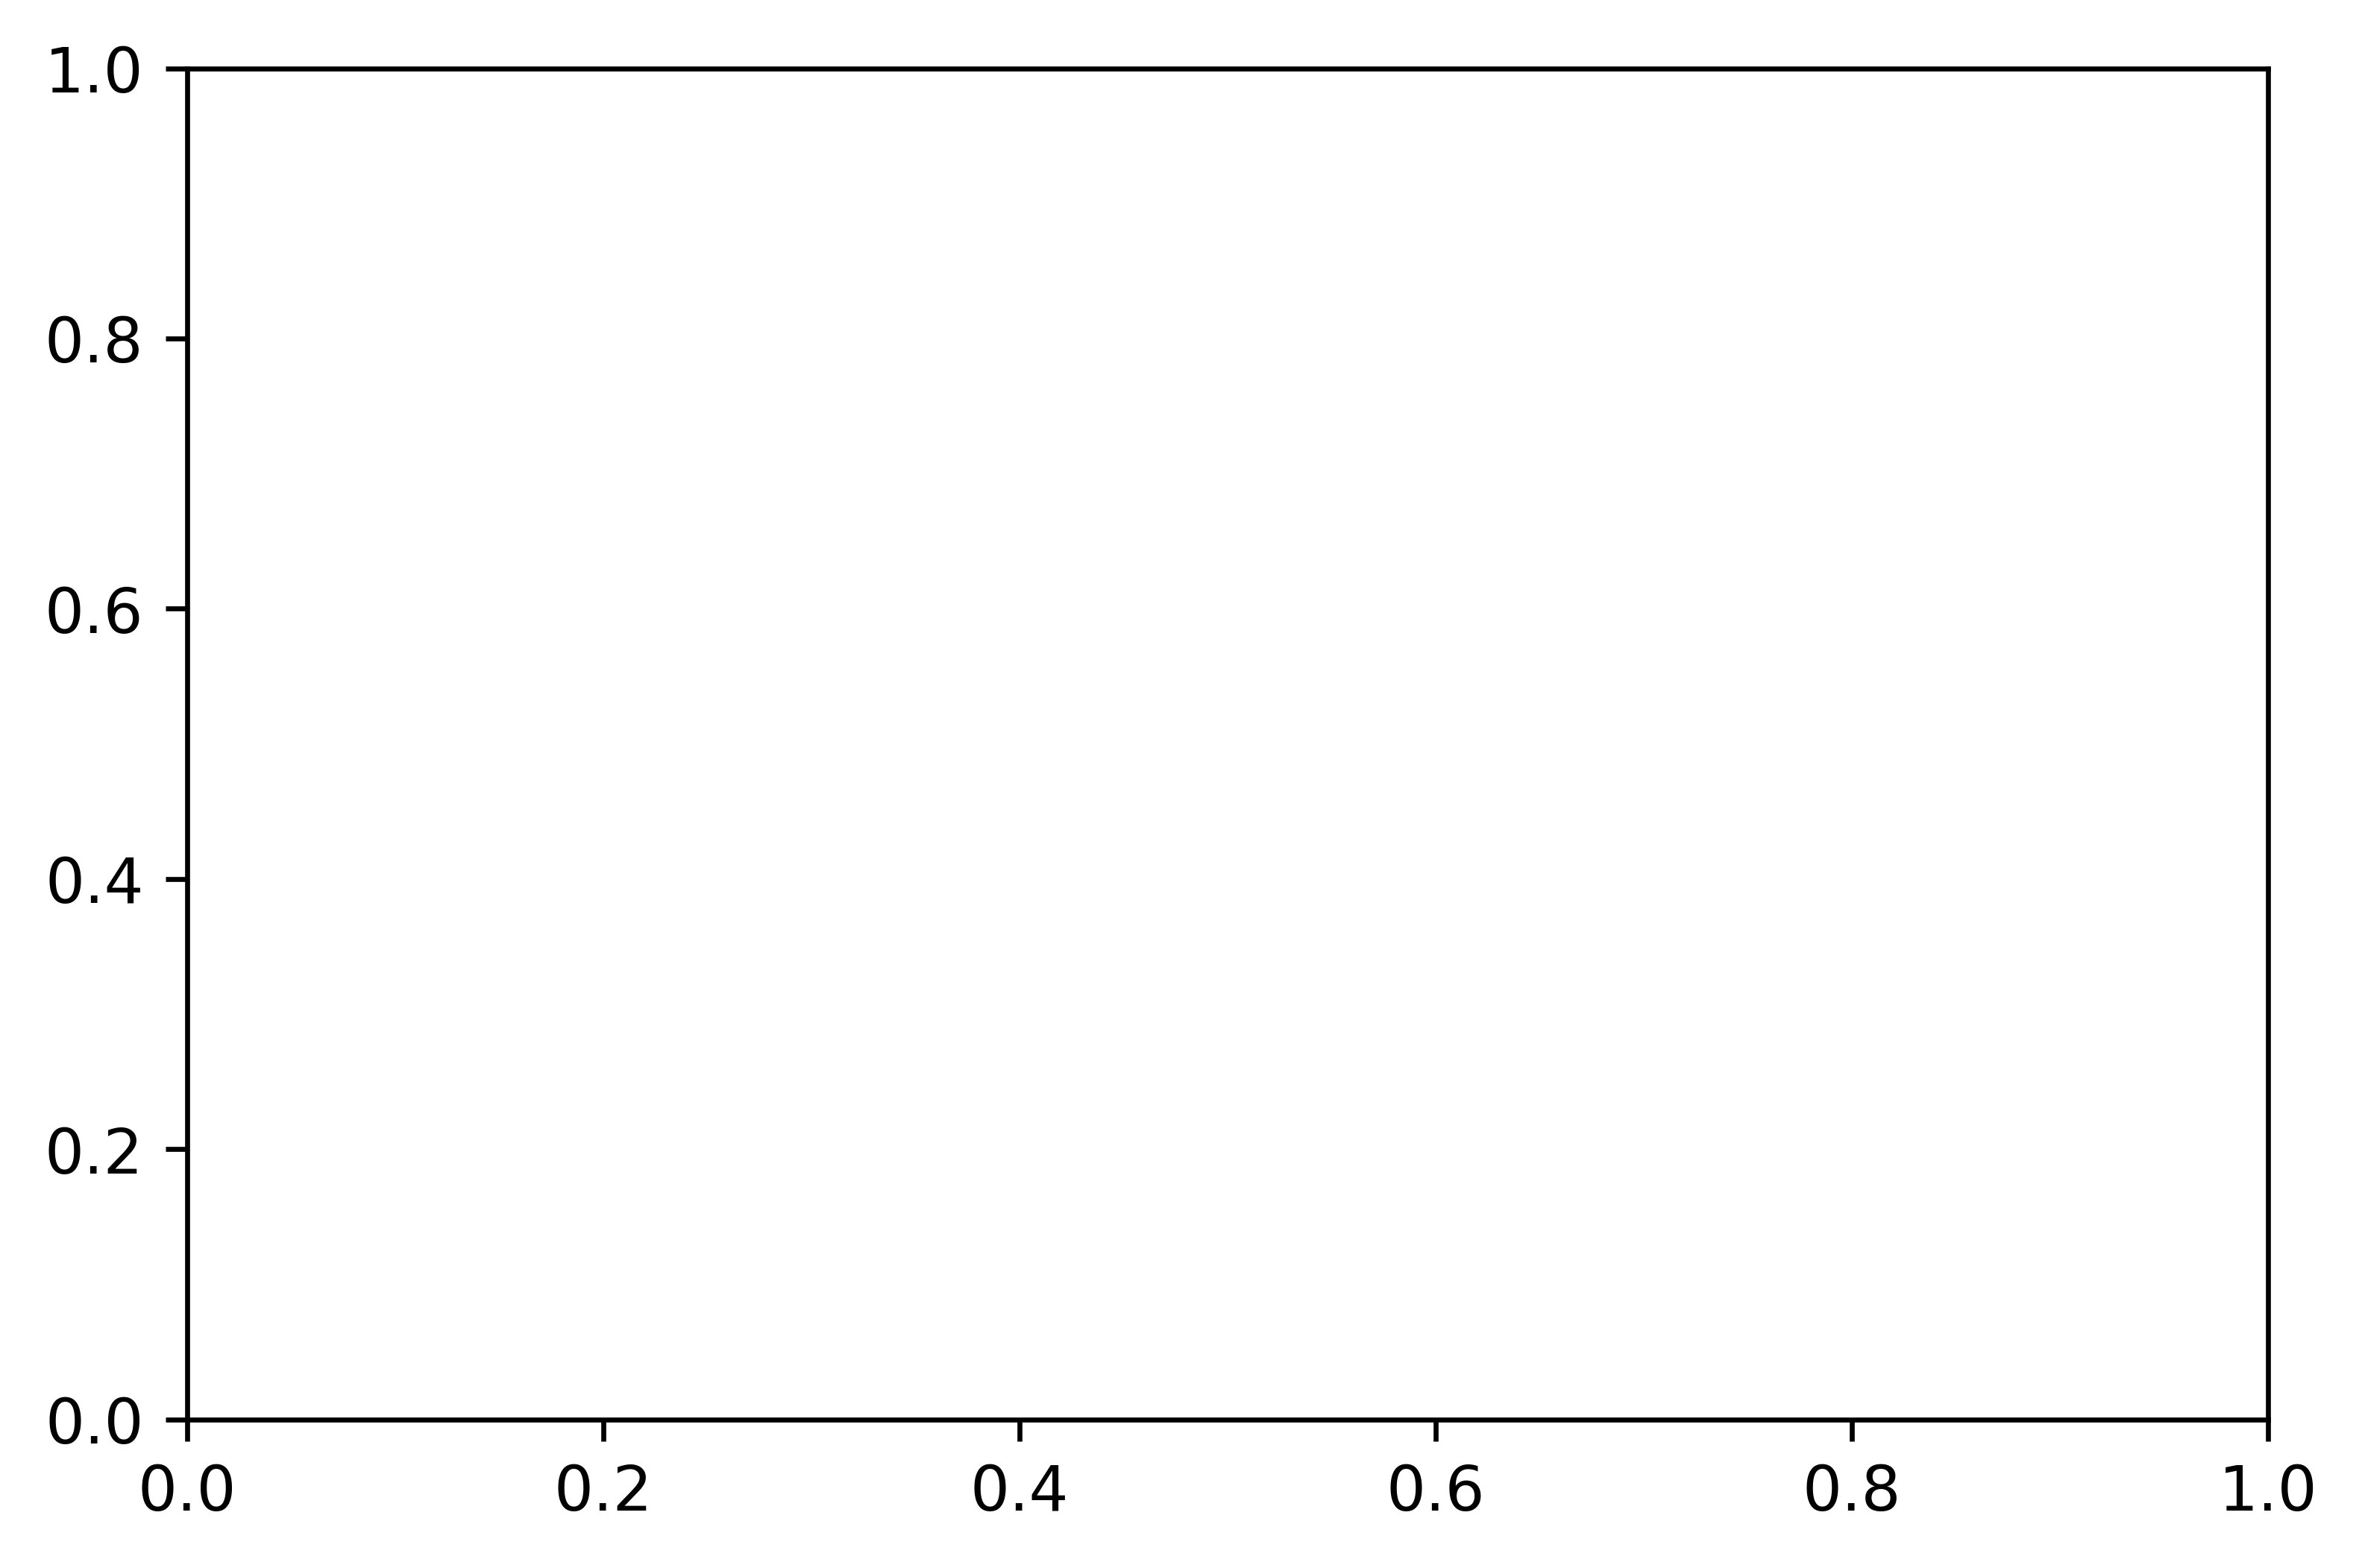

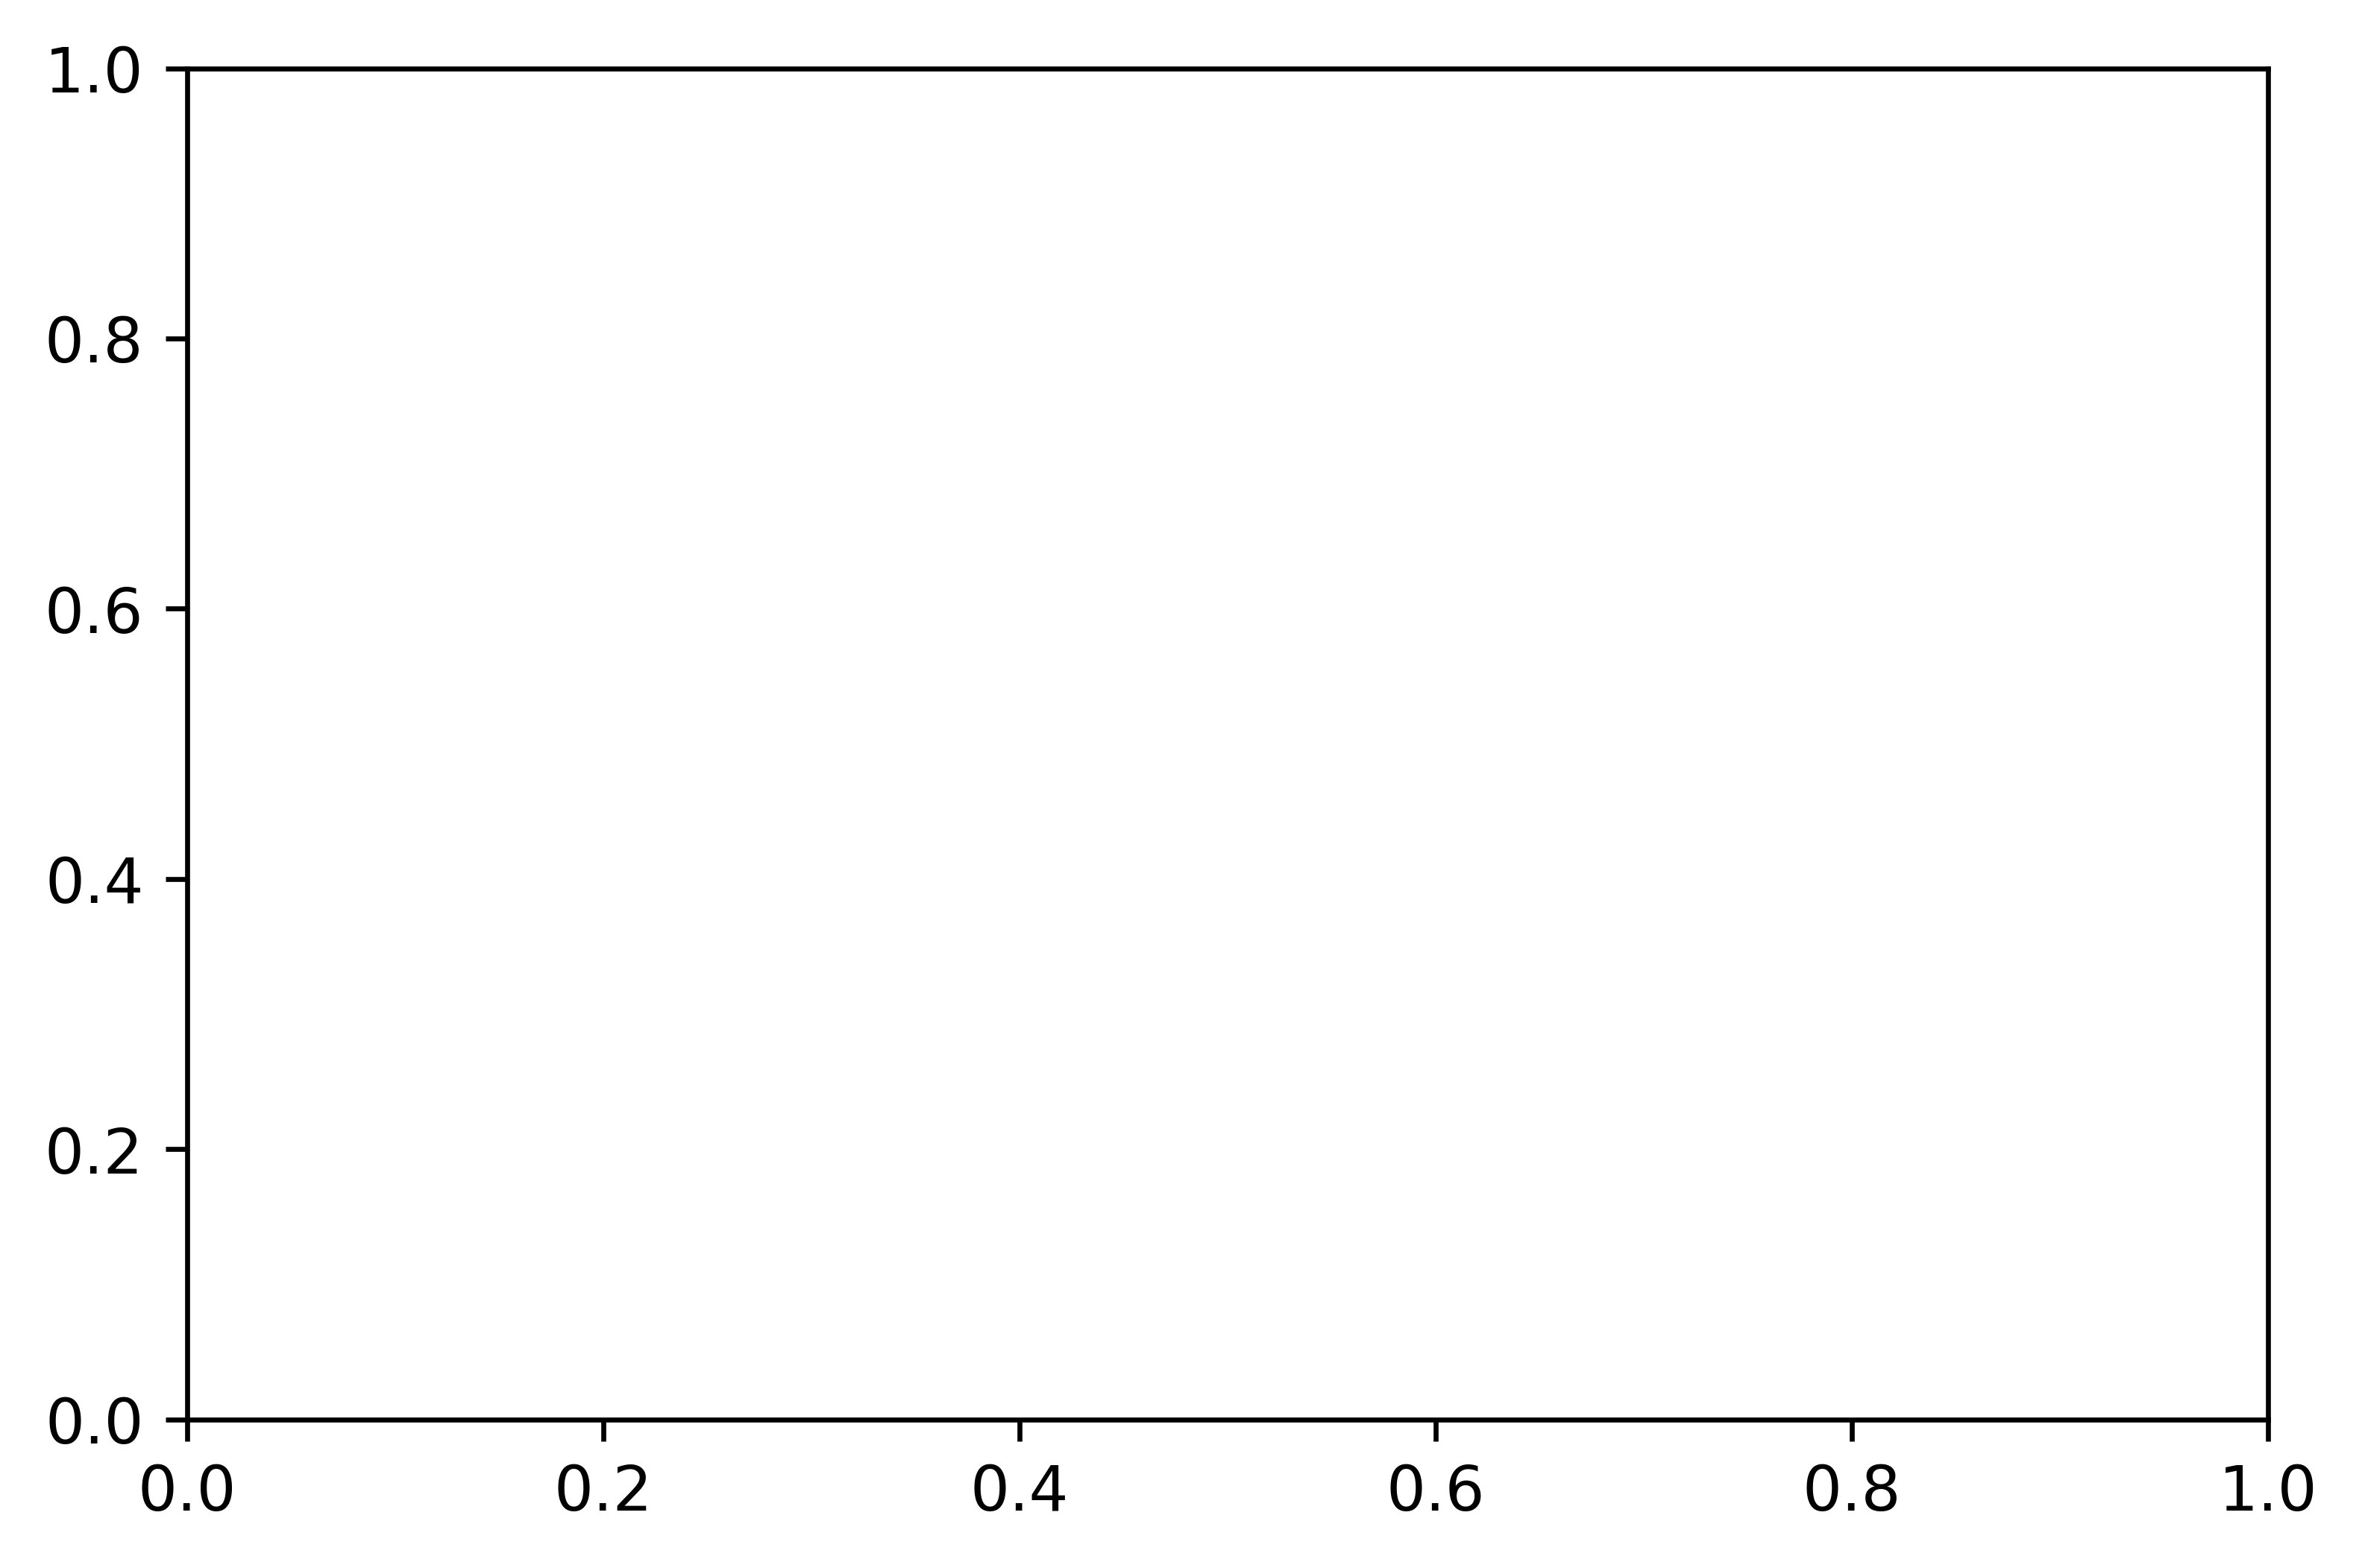

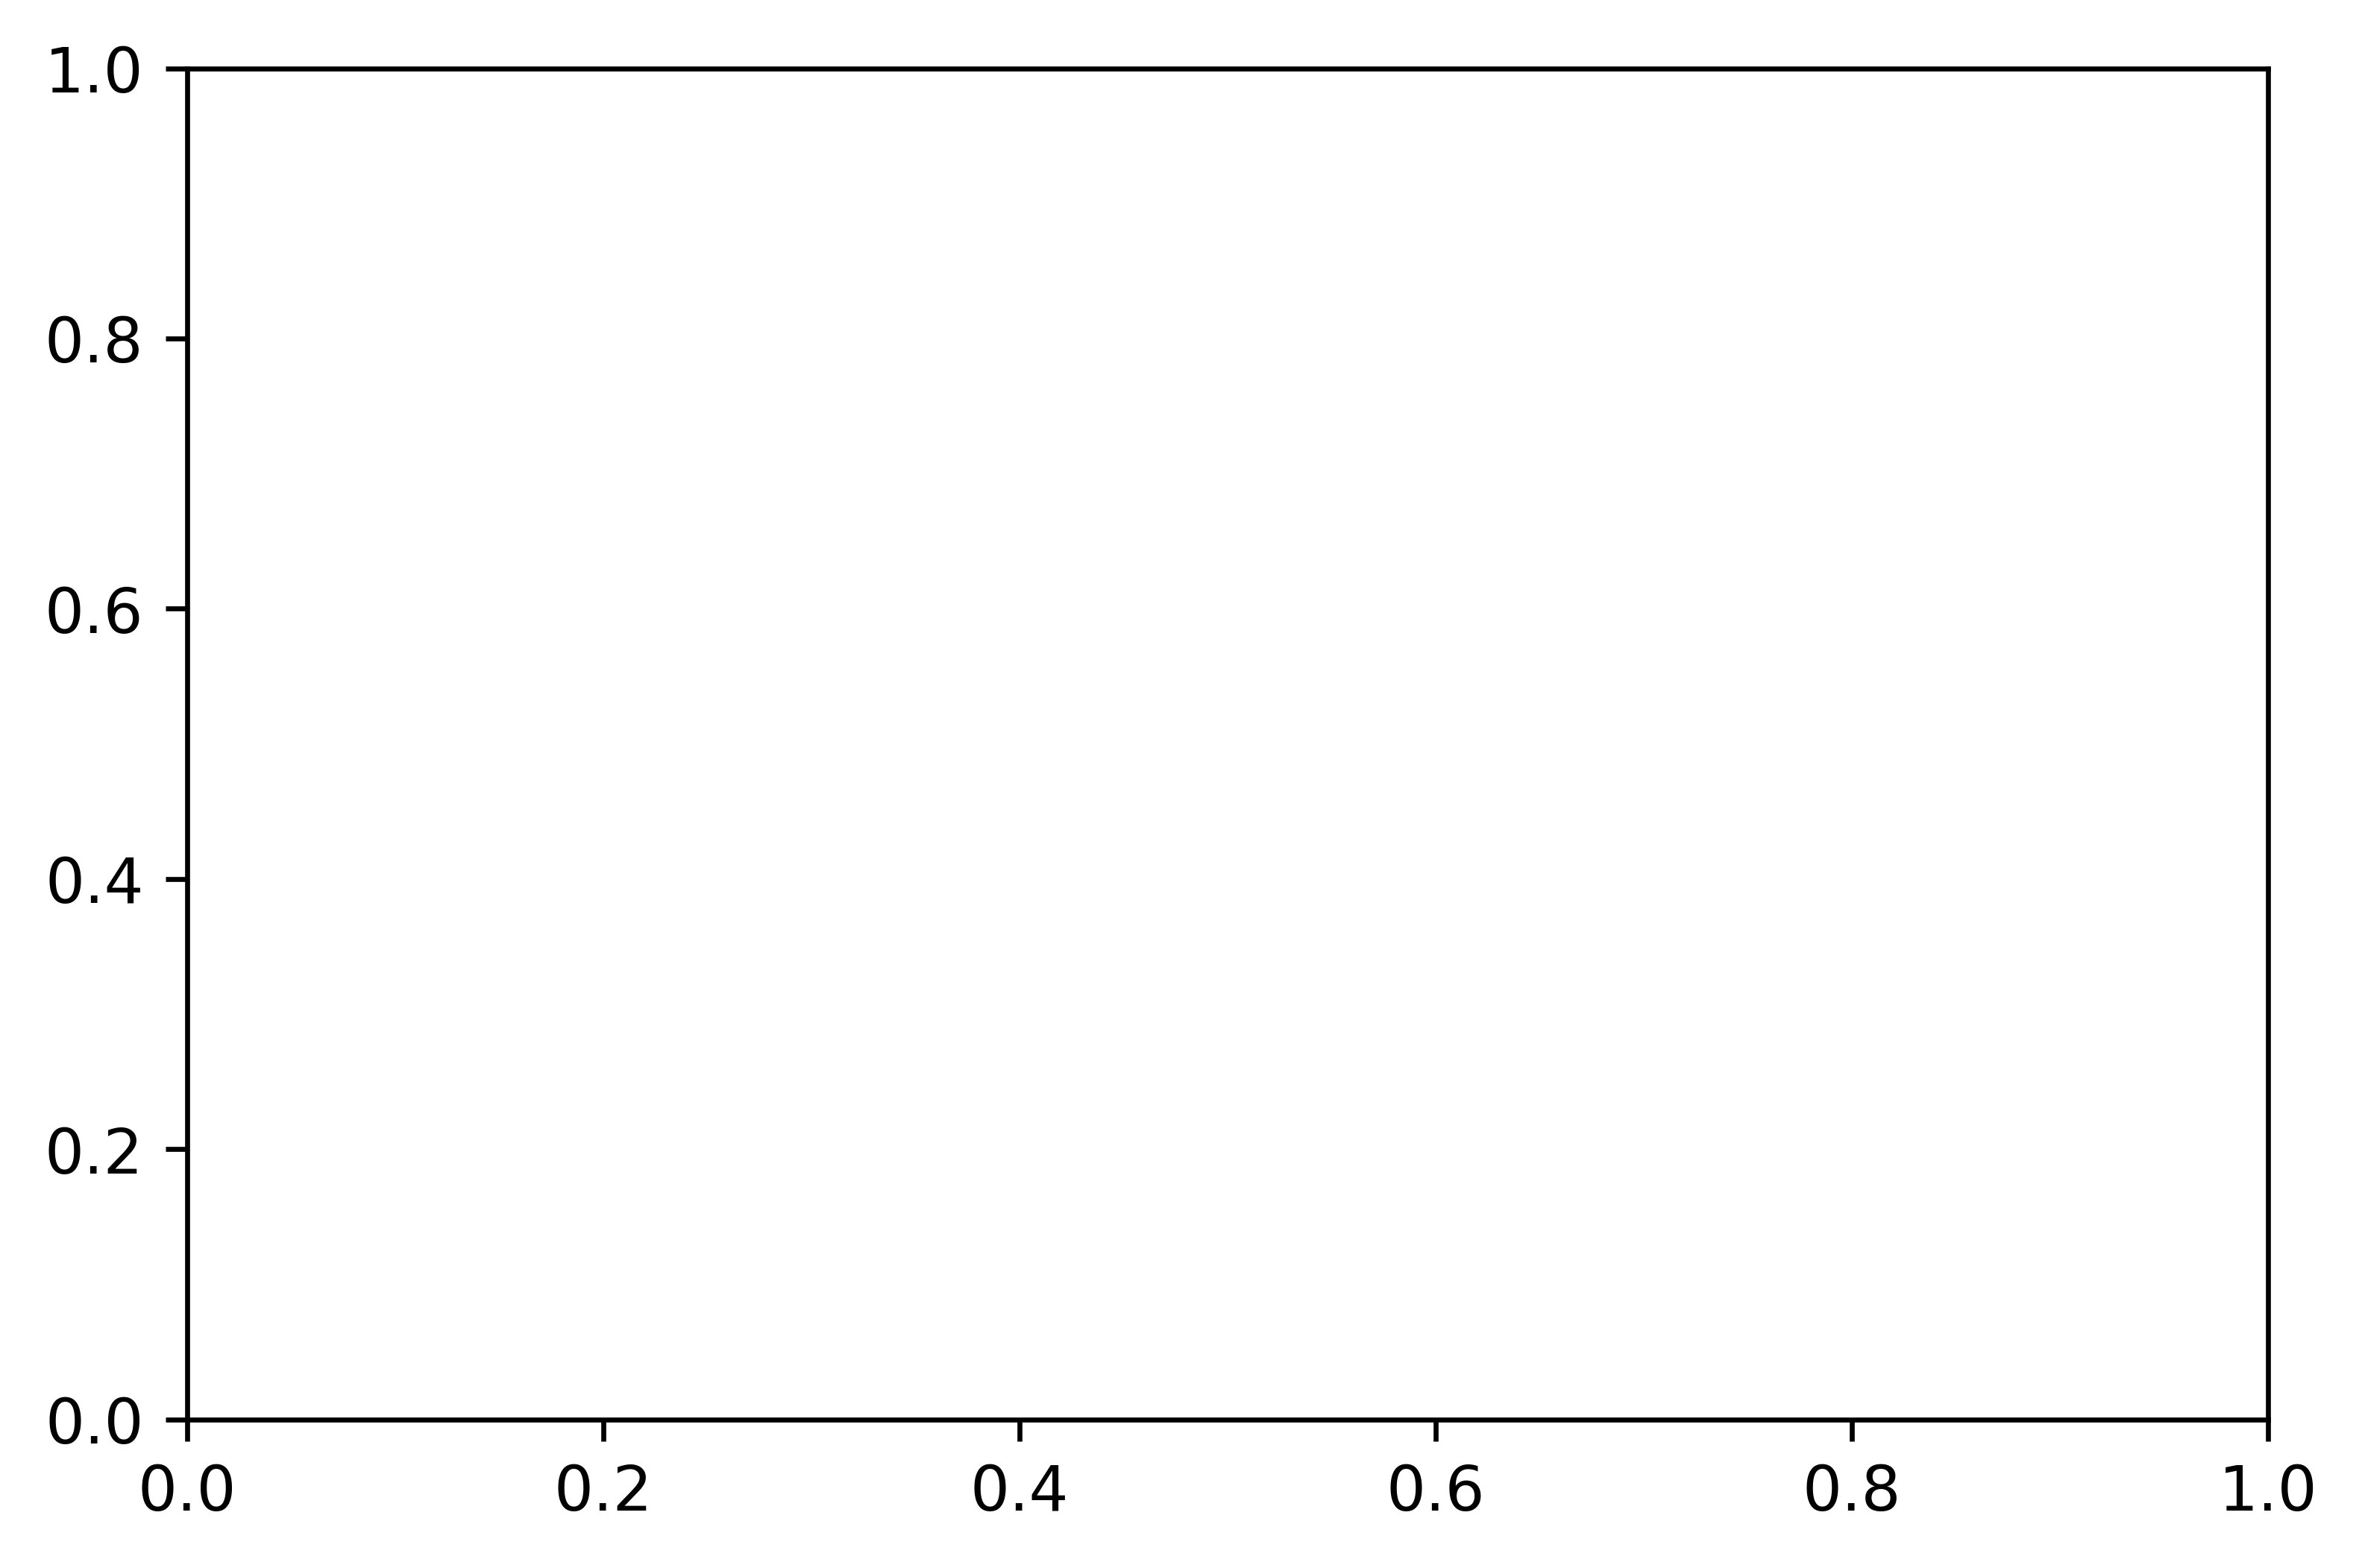

In [1]:
from models.ktrees_model.ktrees_model import KTreesModel
from datetime import datetime
import time
%matplotlib inline 
# import warnings
# warnings.filterwarnings('ignore')

# Features to be used
mag_cols = ['GALEXAIS_FUV', 'GALEXAIS_NUV', # GALEX
            'AllWISE_W1mag', 'AllWISE_W2mag', 'AllWISE_W3mag',  'AllWISE_W4mag', # AllWISE
            'PS1_gmag', 'PS1_rmag', 'PS1_imag' , 'PS1_zmag', 'PS1_ymag' #Pan-STARRS
           ]
start_time = datetime.now() # for recording run-time

#Instantiate model
ktree = KTreesModel(
         cols = mag_cols,
         transform_features = True,
         incl_redshift = True,
         num_runs = 1,
         min_class_size = 6,
         folds = 3,
         naive = False)
ktree.run_model()


end_time = datetime.now()
mins = int(time.mktime(end_time.timetuple()) -
           time.mktime(start_time.timetuple())) / 60
print(ktree.name + " took " + str(mins) + " minutes to run ")
